## 1. Network Structure

## Step1.

In [99]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug  5 22:38:51 2019

@author: Jones
"""

"""
Consider complex input
"""
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D,Conv1D, MaxPooling2D, MaxPooling1D, Flatten, ZeroPadding2D, ZeroPadding1D
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
from keras.callbacks import LearningRateScheduler
import os
import matplotlib.pyplot as plt
import time
from tqdm import tnrange, tqdm_notebook
import pandas as pd
import tensorflow as tf
import math
%matplotlib inline

working_dir = os.getcwd()
#gen_folder_path = os.path.join(working_dir, 'gen_folder')
#gen_folder_path = os.path.join(working_dir, 'NONORM_gen_folder')
#gen_folder_path = os.path.join(working_dir, 'NONORM_42ppm_gen_folder')
gen_folder_path = os.path.join(working_dir, 'NONORM_42ppm_lesssnr_gen_folder')
#gen_folder_path = os.path.join(working_dir, 'gamma_gen_folder')

#del model
keras.backend.clear_session()

from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

###############################################################
#Want to build new model: bulid_model_flag = 1
#Just want import library and load trained model/weghting: bulid_model_flag = 0
###############################################################
bulid_model_flag = 0


if bulid_model_flag :
    model = Sequential()
    input_shape_num = 774#for LCM basis
    #input_shape_num = 467#for gamma basis

    k = 1000#total lines
    #height x width x channel x array = input_shape_num, 1,1,k

    block_1_filter_num = 32
    conv_filter_size = 15

    ############block 1###############
    #要怎麼padding 應該是要CONV前先PADDING 但是一開始不能餵給他 input shape 到底??

    #model.add(Conv1D(filters=block_1_filter_num, kernel_size=(15), strides=1, input_shape=(input_shape_num,1)))
    model.add(Conv1D(filters=block_1_filter_num, kernel_size=(15), strides=1, input_shape=(input_shape_num,1),dtype='float32'))
    #model.add(Conv2D(filters=block_1_filter_num, kernel_size=(15,1), strides=1, input_shape=(input_shape_num,1,2)))
    model.add(BatchNormalization(scale=False, center=False))#?????
    model.add(Activation('relu'))

    #model.add(ZeroPadding2D(padding = (7,0)))
    model.add(ZeroPadding1D(padding = (7)))
    #model.add(Conv2D(filters=block_1_filter_num, kernel_size=(15,1), strides=1))
    model.add(Conv1D(filters=block_1_filter_num, kernel_size=(15), strides=1))
    model.add(BatchNormalization(scale=False, center=False))#?????
    model.add(Activation('relu'))

    #model.add(ZeroPadding2D(padding = (7,0)))
    model.add(ZeroPadding1D(padding = (7)))
    #model.add(Conv2D(filters=block_1_filter_num, kernel_size=(15,1), strides=1))
    model.add(Conv1D(filters=block_1_filter_num, kernel_size=(15), strides=1))
    model.add(BatchNormalization(scale=False, center=False))#?????
    model.add(Activation('relu'))

    #model.add(ZeroPadding2D(padding = (7,0)))
    model.add(ZeroPadding1D(padding = (7)))
    #model.add(Conv2D(filters=block_1_filter_num, kernel_size=(15,1), strides=1))
    model.add(Conv1D(filters=block_1_filter_num, kernel_size=(15), strides=1))
    model.add(BatchNormalization(scale=False, center=False))#?????
    model.add(Activation('relu'))
    #model.add(MaxPooling2D((2,1)))#Why not 1D?
    model.add(MaxPooling1D((2)))#Why not 1D?

    ############block 2###############
    block_2_filter_num = 64
    for nrep in range(4):
        #model.add(ZeroPadding2D(padding = (7,0)))
        #model.add(Conv2D(filters=block_2_filter_num, kernel_size=(15,1), strides=1))
        model.add(ZeroPadding1D(padding = (7)))
        model.add(Conv1D(filters=block_2_filter_num, kernel_size=(15), strides=1))    
        model.add(BatchNormalization(scale=False, center=False))#?????
        model.add(Activation('relu'))
    model.add(MaxPooling1D((2)))#Why not 1D?
    ############block 3###############
    block_3_filter_num = 128
    for nrep in range(4):
        model.add(ZeroPadding1D(padding = (7)))
        model.add(Conv1D(filters=block_2_filter_num, kernel_size=(15), strides=1))
        model.add(BatchNormalization(scale=False, center=False))#?????
        model.add(Activation('relu'))

    ###########FC, Regression##############
    '''
    model.add(Flatten())
    model.add(Dense(input_shape_num, activation = "linear"))
    #model.add(Dense(input_shape_num, kernel_regularizer=l2(0.0001), activation = "linear"))
    model.summary()
    #sgdm = SGD(lr=1e-1, momentum= 0.8, decay=1.0291e-4)
    #sgdm = SGD(lr=3e-8, momentum= 0.8)

    # learning rate schedule
    def step_decay(epoch):
        initial_lrate = 1e-4
        drop = 0.1
        epochs_drop = 90.0
        lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
        return lrate
    #sgdm = SGD(lr=0.0, momentum=0.8)
    # learning schedule callback
    lrate = LearningRateScheduler(step_decay)
    #callbacks_list = [lrate]
    #model.compile(loss = 'mse', optimizer=sgdm,  metrics=['mape'])
    model.compile(loss = 'mse', optimizer='adam',  metrics=['mape'])

    ##########More FC####################
    '''
    model.add(Flatten())
    model.add(Dense(input_shape_num*5, kernel_regularizer=l2(0.0001)))
    #model.add(Dense(input_shape_num, activation = "linear"))
    model.add(Dense(input_shape_num, kernel_regularizer=l2(0.0001), activation = "linear"))
    model.summary()
    #sgdm = SGD(lr=1e-2, momentum= 0.8, decay=1.0291e-4)
    #sgdm = SGD(lr=1e-1, momentum= 0.8, decay=1.0291e-4)

    # learning rate schedule
    def step_decay(epoch):
        initial_lrate = 1e-4
        drop = 0.1
        epochs_drop = 90.0
        lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
        return lrate
    #sgdm = SGD(lr=0.0, momentum=0.8)
    # learning schedule callback
    lrate = LearningRateScheduler(step_decay)

    #加一層loss nan, why?
    #model.compile(loss = 'mse', optimizer=sgdm,  metrics=['mape'])
    model.compile(loss = 'mse', optimizer='adam',  metrics=['mape'])
    #model.compile(loss = 'mse', optimizer='Nadam',  metrics=['mape'])

    #Check layers output
    '''
    from keras.models import Model

    layer1_name = 'flatten_1'
    layer_dense_name = 'dense_1'
    intermediate_layer_flatten_model = Model(inputs=model.input,
                                     outputs=model.get_layer(layer1_name).output)
    intermediate_layer_1stdense_model = Model(inputs=model.input,
                                     outputs=model.get_layer(layer_dense_name).output)
    '''

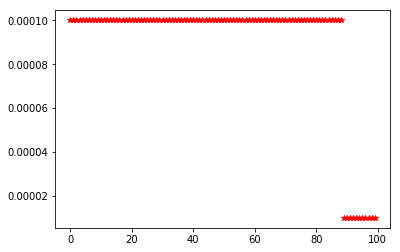

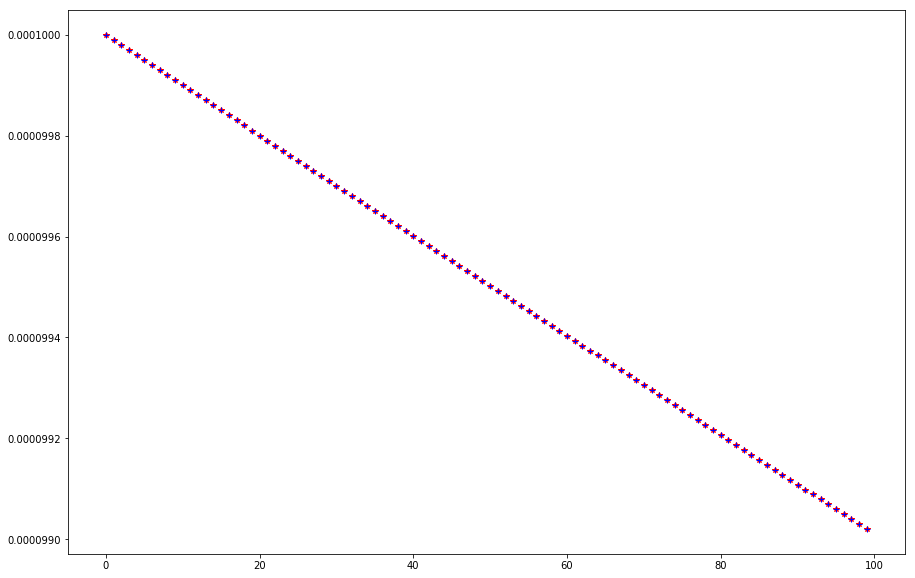

In [109]:
plt.figure(figsize=(6,4))
for i in range(100):
    #print(step_decay(i))
    plt.plot(i, step_decay(i),'*r')
    #plt.ylim(0.,0.0001)

#time decay
def time_decay1(LearningRate, epoch):
    #decay_rate = LearningRate / epochs
    LearningRate = 1e-4
    decay_rate = 1e-4
    LearningRate = LearningRate * 1/(1 + decay_rate * epoch)
    return LearningRate

LearningRate = 1e-4
epochs = 100
plt.figure(figsize=(15,10))

for i in range(epochs):
    #print(step_decay(i))
    plt.plot(i, time_decay1(LearningRate,i),'*r')

LearningRate = 1e-4
def time_decay2(LearningRate, epoch):
    #LearningRate = 1e-4
    decay_rate = 1e-4
    LearningRate = LearningRate * 1/(1 + decay_rate * epoch)
    return LearningRate

for i in range(epochs):
    #print(step_decay(i))
    plt.plot(i, time_decay2(LearningRate,i),'+b')


## Read spectrum data and metabolite concectration table
Read and concatenate read data and conc. table for splitting

***If you just want load the "brain_conc_set" file imdex, set "flag_read_full_data" = 0 ***

## AHUA 2.

In [109]:
import time
from tqdm import tnrange, tqdm_notebook
import pandas as pd

flag_read_full_data = 1

if (flag_read_full_data):
    crop_len = [837,774,467]
    tmp_X = np.zeros((50000,crop_len[1],),dtype=np.csingle)
    tmp_Y = np.zeros((50000,crop_len[1],),dtype=np.csingle)
    #tmp_X = np.zeros((50000,774,),dtype=np.csingle)
    #tmp_Y = np.zeros((50000,774,),dtype=np.csingle)
    files = [ f for f in os.listdir(gen_folder_path) if os.path.isfile(os.path.join(gen_folder_path,f)) ]

    for idx, cont in enumerate(tqdm_notebook(files)):
        read_data= np.load(os.path.join(gen_folder_path, cont))
        tmp_X[idx,:] = read_data['X']
        tmp_Y[idx,:] = read_data['Y']
    read_X = np.expand_dims(tmp_X,axis = 2)
    read_Y = tmp_Y

######################################
# Load conc. table
######################################
rd = np.load(os.path.join(working_dir,'42ppm_base_basis_set.npz'))
#rd = np.load(os.path.join(working_dir,'gamma_42ppm_base_basis_set.npz'))

base_basis_set = rd['data']

brain_betabo_conc_table_path = os.path.join(gen_folder_path, 'brain_betabo_conc_table_df')
brain_betabo_conc_table_files = [ f for f in os.listdir(brain_betabo_conc_table_path) if os.path.isfile(os.path.join(brain_betabo_conc_table_path,f)) ]

brain_conc_set = []

if (flag_read_full_data==0):
    for idx in tqdm_notebook(brain_betabo_conc_table_files[:2]):
        read_data= pd.read_pickle(os.path.join(brain_betabo_conc_table_path, idx))
        read_data.set_index("names" , inplace=True)
        brain_conc_set.append(read_data['conc'])
else:
    for idx in tqdm_notebook(brain_betabo_conc_table_files):
        read_data= pd.read_pickle(os.path.join(brain_betabo_conc_table_path, idx))
        read_data.set_index("names" , inplace=True)
        brain_conc_set.append(read_data['conc'])
print('brain_conc_set',(brain_conc_set[0]))

np_brain_conc_set = np.array(brain_conc_set)

if (flag_read_full_data):
    #Concatenate read data and conc. table for splitting
    read_Y_conc_set = np.concatenate((read_Y, np_brain_conc_set), axis = 1)

HBox(children=(IntProgress(value=0, max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=50000), HTML(value='')))


brain_conc_set names
Ala        0.683329
Asp        1.205270
Cr         5.297169
GABA       1.738934
Glc        1.966285
Gln        5.602159
Glu       10.973310
GPC        0.964496
PCh        0.549005
Lac        0.412460
mI         6.648319
NAA       10.213798
NAAG       1.892935
Scyllo     0.000000
Tau        2.394791
Name: conc, dtype: float64


## Model training config: Early stopping...、Tensor borad

## AHUA 3.

In [3]:
from keras.callbacks import TensorBoard
from keras_tqdm import TQDMNotebookCallback
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
#tensorboard --logdir ./logs 

cb_path = './fc5_adam_200epoch_v1_FWHM_logs'

tbCallBack = TensorBoard(log_dir=cb_path,# log 目录
                 histogram_freq=0,  # 按照何等频率（epoch）来计算直方图，0为不计算
#                  batch_size=32,     # 用多大量的数据计算直方图
                 write_graph=True,  # 是否存储网络结构图
                 write_grads=True, # 是否可视化梯度直方图
                 write_images=True,# 是否可视化参数
                 embeddings_freq=0, 
                 embeddings_layer_names=None, 
                 embeddings_metadata=None)
earlystopper = EarlyStopping(patience=30,monitor='val_loss', mode='min', verbose=1)
checkpointer = ModelCheckpoint(filepath = cb_path+'/TP1.h5',monitor='val_loss',mode='min')
reducelronplateau = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=1e-7, verbose=1)
def on_epoch_end(self, epoch, logs=None):
    print(K.eval(self.model.optimizer.lr))
print(cb_path + '/TP1.h5')
# Early stopping pation應該要>>reduceonpleadue 

'''
Checkpoints =[EarlyStopping(patience=8,monitor='val_loss', mode='min', verbose=1),
              ModelCheckpoint(filepath = cb_path+'/TP1.h5',monitor='val_loss',mode='min'),
              ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-5, verbose=1)]
#EarlyStopping: 当被监测的数量沒有變得更好，则停止训练。 In min mode, training will stop when the quantity monitored has stopped decreasing
#ModelCheckpoint(filepath = './TP1.h5',monitor='val_loss',mode='min'),
#os.path.join(cb_path,weights.{epoch:02d}-{val_loss:.2f}.h5)
class SGDLearningRateTracker(Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = K.eval(optimizer.lr * (1. / (1. + optimizer.decay * optimizer.iterations)))
        print('\nLR: {:.6f}\n'.format(lr))
# define your model

#model.fit(x, y, callbacks=[SGDLearningRateTracker()])
'''


./fc5_adam_200epoch_v1_FWHM_logs/TP1.h5


"\nCheckpoints =[EarlyStopping(patience=8,monitor='val_loss', mode='min', verbose=1),\n              ModelCheckpoint(filepath = cb_path+'/TP1.h5',monitor='val_loss',mode='min'),\n              ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-5, verbose=1)]\n#EarlyStopping: 当被监测的数量沒有變得更好，则停止训练。 In min mode, training will stop when the quantity monitored has stopped decreasing\n#ModelCheckpoint(filepath = './TP1.h5',monitor='val_loss',mode='min'),\n#os.path.join(cb_path,weights.{epoch:02d}-{val_loss:.2f}.h5)\nclass SGDLearningRateTracker(Callback):\n    def on_epoch_end(self, epoch, logs={}):\n        optimizer = self.model.optimizer\n        lr = K.eval(optimizer.lr * (1. / (1. + optimizer.decay * optimizer.iterations)))\n        print('\nLR: {:.6f}\n'.format(lr))\n# define your model\n\n#model.fit(x, y, callbacks=[SGDLearningRateTracker()])\n"

## (Optional) If want to load previous model, execute this cell

In [100]:

from keras.models import load_model
#Use it if model had been trained
#model = load_model('Oct-23-2019.h5')#stable ver. but is to 4.5ppm
#model = load_model('Oct-31-2019.h5')#Zero center Normalized data weighting
#model = load_model('Nov-01-2019.h5')# Add more FC layer
#model = load_model('Nov-04-2019_epoch90.h5')#adjust NAAG
#model = load_model('Nov-11-2019.h5')#global_norm
#model = load_model('Nov-12-2019.h5')#global_norm_modify boarden t2, MM
#model = load_model('Nov-17-2019.h5')#global_norm_modify boarden t2, less snr
#model = load_model('Nov-22-2019.h5')#universal norm real=imag
#model = load_model('Nov-25-00-2019.h5')#WATER SCALING
#model = load_model('Nov-25-00-2019.h5')#Add more FC
#model = load_model('Nov-27-13-2019.h5')#Add more FC, adam, out = 5*774
#model = load_model('Nov-27-17-2019.h5')#Add more FC, adam, out = 1*774
#model = load_model('Dec-02-11-2019.h5')#gamma
#model = load_model('Dec-03-19-2019.h5')#LCM basis, sgsm(follow paper), l2, no fc, 600 epoch
#model = load_model('Dec-04-12-2019.h5')#LCM basis, sgsm(follow paper but lr, add drop decay), no fc, 100 epoch
#model = load_model('Dec-04-19-2019.h5')#LCM basis, adam, fc, 600 epoch
#model = load_model('Dec-08-22-2019.h5')#LCM basis, Nadam, fc*5, 100 epoch
#model = load_model('Dec-09-16-2019.h5')#LCM basis, Nadam, fc*5, 200 epoch, l2=1e-4
#model = load_model('Dec-10-14-2019.h5')#LCM basis, Nadam, fc*5, 100 epoch, checkpoint
#model = load_model('Dec-25-14-2019.h5')#LCM basis, adam, fc*5, 200 epoch, tb loss low
model = load_model('Jan-06-22-2020.h5')#LCM basis, adam, fc*5, 200 epoch, datasnr, loss low => better
#model = load_model('Jan-07-14-2020.h5')#LCM basis, adam, fc5_adam_200epoch_v1_FWHM

## Split training and testing data (Include metabo conc. table)

## AHUA 4.

In [66]:
########################new model
from sklearn.model_selection import train_test_split
##(input_shape_num,1,2)

X_train, X_test, Y_train_conc , Y_test_conc = train_test_split(read_X, read_Y_conc_set, test_size = 0.1, random_state = 42)

X_train = X_train[:,:,0]
X_test = X_test[:,:,0]

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)

Y_train = Y_train_conc[:,:-15]
Y_test = Y_test_conc[:,:-15]
conc_table_train = Y_train_conc[:,-15:].real
conc_table_test = Y_test_conc[:,-15:].real

print('conc_table_train',conc_table_train.shape)
print('conc_table_test',conc_table_test.shape)
print('Y_train',Y_train.shape)
print('Y_test',Y_test.shape)

X_train = np.expand_dims(X_train.real, axis = 2)
#X_train = np.expand_dims(X_train, axis = 2)

X_test = np.expand_dims(X_test.real, axis = 2)
#X_test = np.expand_dims(X_test, axis = 2)

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)

X_train: (45000, 774)
X_test: (5000, 774)
conc_table_train (45000, 15)
conc_table_test (5000, 15)
Y_train (45000, 774)
Y_test (5000, 774)
X_train: (45000, 774, 1)
X_test: (5000, 774, 1)


"\nfrom sklearn.model_selection import train_test_split\n##(input_shape_num,1,2)\n\nX_train, X_test, Y_train_conc , Y_test_conc = train_test_split(read_X, read_Y_conc_set, test_size = 0.1, random_state = 42)\n\nX_train = X_train[:,:,0]\nX_test = X_test[:,:,0]\n\nprint('X_train:',X_train.shape)\nprint('X_test:',X_test.shape)\n\nY_train = Y_train_conc[:,:-16]\nY_test = Y_test_conc[:,:-16]\nconc_table_train = Y_train_conc[:,-16:].real\nconc_table_test = Y_test_conc[:,-16:].real\n\nprint('conc_table_train',conc_table_train.shape)\nprint('conc_table_test',conc_table_test.shape)\nprint('Y_train',Y_train.shape)\nprint('Y_test',Y_test.shape)\n\nX_train = np.expand_dims(X_train.real, axis = 2)\n#X_train = np.expand_dims(X_train, axis = 2)\n\nX_test = np.expand_dims(X_test.real, axis = 2)\n#X_test = np.expand_dims(X_test, axis = 2)\n\nprint('X_train:',X_train.shape)\nprint('X_test:',X_test.shape)\n"

## Start training then save model.

## AHUA 5.

In [5]:
import datetime
today = datetime.datetime.now()
sav_model_date = today.strftime("%b-%d-%H-%Y")+'.h5'

model.reset_states()
#################Start training#####################
#model.fit(X_train, Y_train,verbose=0, epochs=100, validation_split=0.1 , batch_size=32, callbacks=[tbCallBack,TQDMNotebookCallback()])
#model.fit(X_train, Y_train,verbose=0, epochs=600, validation_split=0.1 , batch_size=32, callbacks=[tbCallBack,TQDMNotebookCallback()])
#model.fit(X_train, Y_train,verbose=0, epochs=100, validation_split=0.1 , batch_size=32, callbacks=[tbCallBack,TQDMNotebookCallback(),lrate])
model.fit(X_train, Y_train,verbose=0, epochs=200, validation_split=0.1 , batch_size=32, callbacks=[tbCallBack,TQDMNotebookCallback(),earlystopper,checkpointer ,reducelronplateau])

#To check tensorboard , please cd to the current folder and:
#tensorboard --logdir ./logs 

model.save(sav_model_date)


Instructions for updating:
Use tf.cast instead.


HBox(children=(IntProgress(value=0, description='Training', max=200, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


HBox(children=(IntProgress(value=0, description='Epoch 1', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 2', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 3', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 4', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 5', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 6', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.


HBox(children=(IntProgress(value=0, description='Epoch 7', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 8', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 9', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 10', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 11', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 12', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 13', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 14', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 15', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 16', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 17', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 18', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 19', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 20', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 21', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 22', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 23', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 24', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 25', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 26', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 27', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 28', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 29', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00030: ReduceLROnPlateau reducing learning rate to 0.0006400000303983689.


HBox(children=(IntProgress(value=0, description='Epoch 30', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 31', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 32', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 33', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 34', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 35', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 36', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 37', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 38', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 39', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 40', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 41', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 42', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 43', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 44', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 45', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 46', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 47', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 48', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 49', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 50', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 51', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 52', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 53', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 54', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00055: ReduceLROnPlateau reducing learning rate to 0.0005120000336319208.


HBox(children=(IntProgress(value=0, description='Epoch 55', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 56', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 57', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 58', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 59', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00060: ReduceLROnPlateau reducing learning rate to 0.00040960004553198815.


HBox(children=(IntProgress(value=0, description='Epoch 60', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 61', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 62', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 63', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 64', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 65', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 66', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 67', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 68', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 69', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 70', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 71', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 72', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 73', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 74', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 75', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 76', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 77', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 78', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 79', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 80', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 81', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 82', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 83', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 84', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00085: ReduceLROnPlateau reducing learning rate to 0.00032768002711236477.


HBox(children=(IntProgress(value=0, description='Epoch 85', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 86', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 87', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 88', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 89', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00090: ReduceLROnPlateau reducing learning rate to 0.0002621440216898918.


HBox(children=(IntProgress(value=0, description='Epoch 90', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 91', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 92', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 93', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 94', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 95', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 96', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 97', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00098: ReduceLROnPlateau reducing learning rate to 0.00020971521735191345.


HBox(children=(IntProgress(value=0, description='Epoch 98', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 99', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 100', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 101', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 102', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 103', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 104', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 105', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 106', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 107', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 108', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 109', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 110', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 111', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 112', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 113', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 114', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00115: ReduceLROnPlateau reducing learning rate to 0.00016777217388153076.


HBox(children=(IntProgress(value=0, description='Epoch 115', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 116', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 117', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 118', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 119', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00120: ReduceLROnPlateau reducing learning rate to 0.00013421773910522462.


HBox(children=(IntProgress(value=0, description='Epoch 120', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 121', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 122', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 123', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 124', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 125', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 126', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 127', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 128', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 129', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 130', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 131', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 132', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00133: ReduceLROnPlateau reducing learning rate to 0.00010737419361248613.


HBox(children=(IntProgress(value=0, description='Epoch 133', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 134', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 135', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 136', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 137', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 138', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 139', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 140', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 141', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 142', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 143', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 144', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00145: ReduceLROnPlateau reducing learning rate to 8.589935605414213e-05.


HBox(children=(IntProgress(value=0, description='Epoch 145', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 146', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 147', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 148', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 149', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00150: ReduceLROnPlateau reducing learning rate to 6.871948717162013e-05.


HBox(children=(IntProgress(value=0, description='Epoch 150', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 151', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 152', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 153', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 154', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 155', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 156', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 157', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 158', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 159', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00160: ReduceLROnPlateau reducing learning rate to 5.497558740898967e-05.


HBox(children=(IntProgress(value=0, description='Epoch 160', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 161', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 162', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 163', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 164', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00165: ReduceLROnPlateau reducing learning rate to 4.398046876303852e-05.


HBox(children=(IntProgress(value=0, description='Epoch 165', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 166', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 167', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 168', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 169', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00170: ReduceLROnPlateau reducing learning rate to 3.518437442835421e-05.


HBox(children=(IntProgress(value=0, description='Epoch 170', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 171', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 172', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 173', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 174', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00175: ReduceLROnPlateau reducing learning rate to 2.8147498960606756e-05.


HBox(children=(IntProgress(value=0, description='Epoch 175', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 176', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 177', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 178', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 179', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 180', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 181', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 182', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 183', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00184: ReduceLROnPlateau reducing learning rate to 2.25179988774471e-05.


HBox(children=(IntProgress(value=0, description='Epoch 184', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 185', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 186', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 187', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 188', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00189: ReduceLROnPlateau reducing learning rate to 1.8014399392995985e-05.


HBox(children=(IntProgress(value=0, description='Epoch 189', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 190', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 191', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 192', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 193', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 194', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00195: ReduceLROnPlateau reducing learning rate to 1.4411519805435093e-05.


HBox(children=(IntProgress(value=0, description='Epoch 195', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 196', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 197', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 198', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 199', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00200: ReduceLROnPlateau reducing learning rate to 1.1529216135386379e-05.



5000/5000 [==============================] - ETA: 14 - ETA: 3 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 306us/step
pred_res.shape!! (5000, 774)
td shape (1,)


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


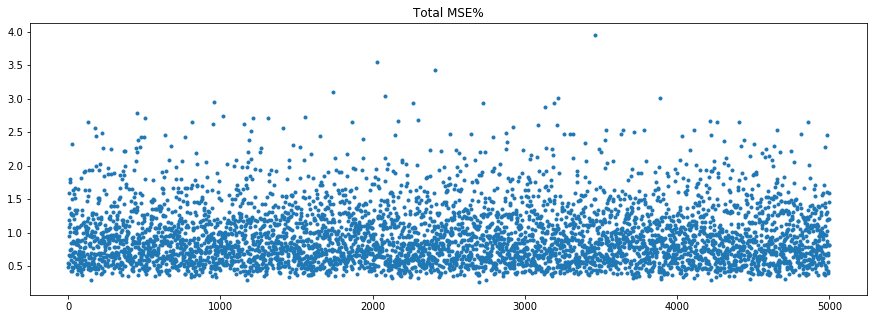

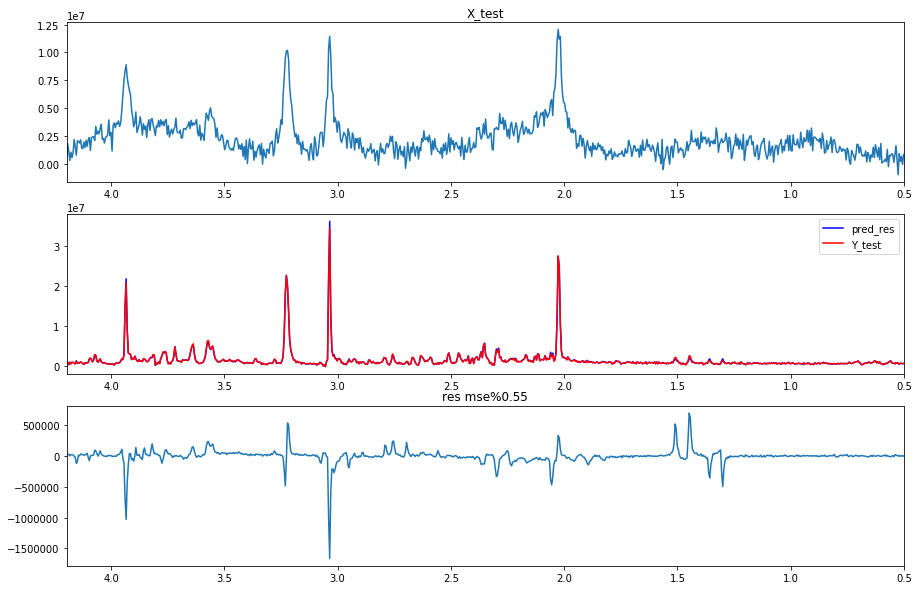

In [67]:
##################Predict##################
#loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=128)
pred_res = model.predict(X_test, verbose=1)

##################Predict##################

##################plot ppm config##################
#for lcm basis, 0
#gamma, 1
choice = 0

basis_sample_point = [4096,4944]
basis_BW = [2500,4823]
basis_B = [127.75, 123.23]

sample_point = basis_sample_point[choice]
BW = basis_BW[choice]
B = basis_B[choice]

ppm_length = BW/B#16.xx ppm
ppm_center = 4.7
min_bound = ppm_center - (ppm_length)/2
max_bound = ppm_center + (ppm_length)/2
ppm = np.linspace(min_bound, max_bound, sample_point)
ppm = ppm[::-1]#reverse

###Original####
pos = np.where((ppm>=0.5) & (ppm<=4.2))
crop_ppm = ppm[pos]
##################plot ppm config##################

pred_res_view = pred_res
print('pred_res.shape!!',pred_res.shape)#(2, 837)

#X_test_view = X_test[:,:,:,0] + 1j*(X_test[:,:,:,1])
X_test_view = X_test
#Y_test_view = Y_test[:,:774] + 1j*(Y_test[:,774:])
Y_test_view = Y_test
#X_test_view = X_test_view*10

#plot total mse on test set
total_err = Y_test_view.real - pred_res_view.real
total_err_sqr = np.square(total_err)
total_msep = (np.mean(total_err_sqr,axis = 1)/np.max(total_err_sqr, axis = 1))*100

plt.figure(figsize=(15,5))
plt.title('Total MSE%')
plt.plot(total_msep,'.')


td = np.array(np.where(total_msep > 0))[0]
td = td[:1]
print('td shape',td.shape)

#num = 10
#for num in range(2):
for num in td:
    #plt.figure(figsize=(15,15))
    plt.figure(figsize=(15,10))#寬, 高
    plt.subplot(311)
    plt.title('X_test')
    plt.plot(crop_ppm, X_test_view[num])
    plt.xlim(crop_ppm.max(),crop_ppm.min())
    plt.subplot(312)
    #plt.title('pred_res')
    plt.plot(crop_ppm, pred_res_view[num],label = 'pred_res',color='b')
    plt.xlim(crop_ppm.max(),crop_ppm.min())
    #plt.xlim(500,540)
    #plt.ylim(0,6e7)
    #plt.subplot(413)
    #plt.title('Y_test')
    plt.plot(crop_ppm, Y_test_view[num],label = 'Y_test',color='r')
    plt.xlim(crop_ppm.max(),crop_ppm.min())    
    plt.legend(loc='upper right')
    #plt.xlim(500,540)
    #plt.ylim(0,6e7)
   
    plt.subplot(313)
    err = ((Y_test_view[num]).real- (pred_res_view[num]).real)
    err_square = np.square(err)    
    msep = (np.mean(err_square)/err_square.max())*100
    plt.title(f'res mse%{round(msep, 2)}')
    plt.plot(crop_ppm, err)
    plt.xlim(crop_ppm.max(),crop_ppm.min())    
    #plt.ylim(-1e6,3e+7)


## Quantification

[[0, 'Ala'], [1, 'Asp'], [2, 'Cr'], [3, 'GABA'], [4, 'Glc'], [5, 'Gln'], [6, 'Glu'], [7, 'GPC'], [8, 'PCh'], [9, 'Lac'], [10, 'mI'], [11, 'NAA'], [12, 'NAAG'], [13, 'tNAA'], [14, 'tCr'], [15, 'tCho'], [16, 'Glx'], [17, 'Glx/tCr'], [18, 'mI/tCr'], [19, 'tCho/tCr'], [20, 'tNAA/Cr']]
5000


HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))


[2, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16]


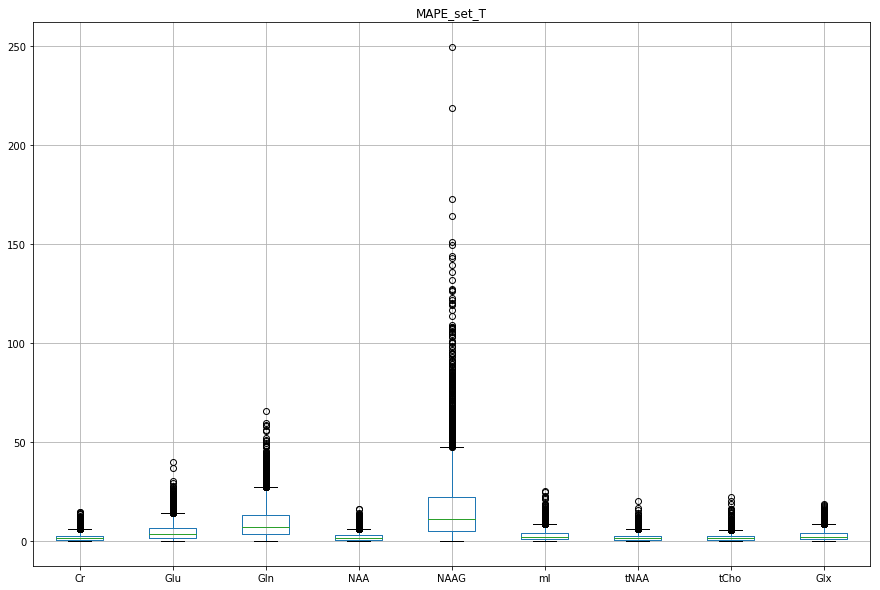

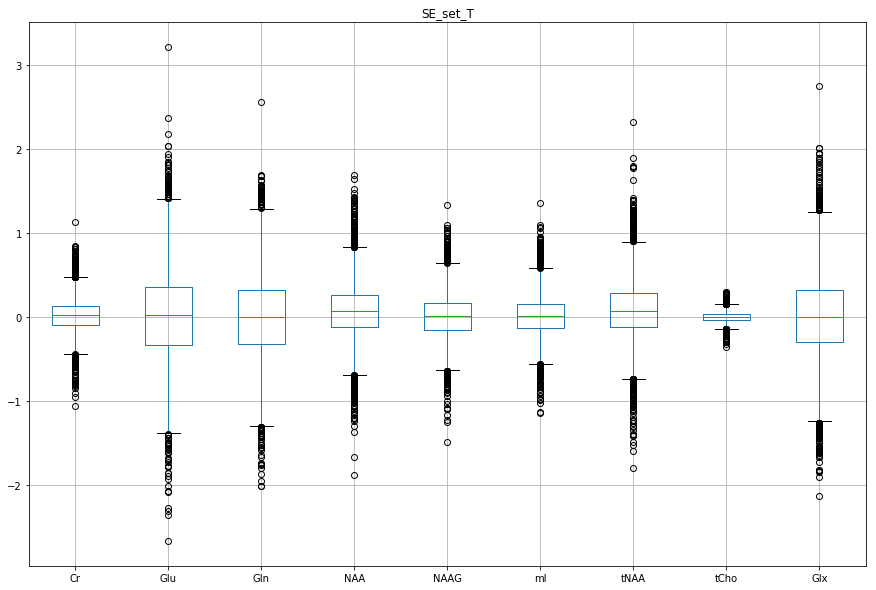

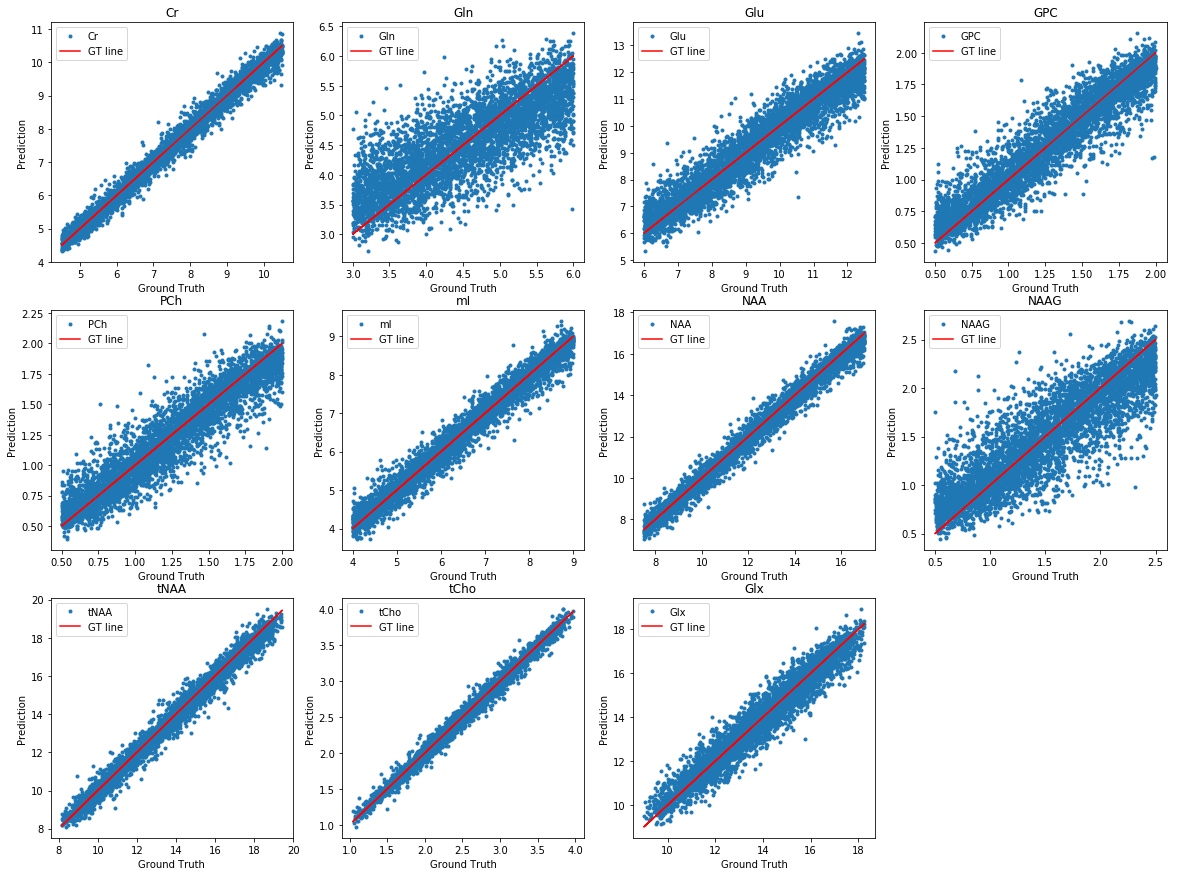

In [68]:
# Change metabo data type to dataframe for stactistic uses, and replace index to metabo name.
brain_metabo_index =  brain_conc_set[0].index
pd_conc_table_test =  pd.DataFrame(conc_table_test).T
pd_conc_table_test = pd_conc_table_test.set_index(brain_metabo_index)

add_metabo_index = brain_metabo_index[:-2]
add_metabo_index = list(add_metabo_index)
add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tCr','mI/tCr','tCho/tCr','tNAA/Cr'])
#print(add_metabo_index)
print ([list((i, add_metabo_index[i])) for i in range(len(add_metabo_index))]) 

C_set = pd.DataFrame(data=np.zeros([len(add_metabo_index),len(pred_res_view)]), index=add_metabo_index)
MAPE_set = pd.DataFrame(data=np.zeros([len(add_metabo_index),len(pred_res_view)]), index=add_metabo_index)
SE_set = pd.DataFrame(data=np.zeros([len(add_metabo_index),len(pred_res_view)]), index=add_metabo_index)
#for statstic
Y_conc_set = pd.DataFrame(data=np.zeros([len(add_metabo_index),len(pred_res_view)]), index=add_metabo_index)

rd = np.load(os.path.join(working_dir,'42ppm_base_basis_set.npz'))
#gamma
#rd = np.load(os.path.join(working_dir,'gamma_42ppm_base_basis_set.npz'))

base_basis_set = rd['data']

#base_basis_set = base_basis_set.real/Y_test_max_real

#pred_res_view = pred_res_view * x_test_std
#pred_res_view = np.multiply(pred_res_view.real.T, (x_test_std)).T

#[[0, 'Ala'], [1, 'Asp'], [2, 'Cr'], [3, 'GABA'], [4, 'Glc'], [5, 'Gln'], [6, 'Glu'], 
#[7, 'GPC'], [8, 'PCh'], [9, 'Lac'], [10, 'mI'], [11, 'NAA'], [12, 'NAAG'], [13, 'tNAA'], 
#[14, 'tCr'], [15, 'tCho'], [16, 'Glx'], [17, 'Glx/tNAA'], [18, 'mI/tNAA'], [19, 'tCho/tNAA'], [20, 'tCr/tNAA']]

pinv_b = np.linalg.pinv(base_basis_set.real)
print(len(pred_res_view))
for i in tqdm_notebook(range(len(pred_res_view))):
    C = np.matmul(pred_res_view[i].real, pinv_b)
    Y_conc = pd_conc_table_test[i][:-2]
    #MAPE = (abs(Y_conc - C)/Y_conc)*100
    #SE = Y_conc - C    
    
    #tNAA = NAA + NAAG, [11] + [12]
    C = np.append(C, C[11]+C[12])
    Y_conc = np.append(Y_conc, Y_conc[11]+Y_conc[12])    
    #MAPE = pd.concat([MAPE, MAPE[11]+MAPE[12]], axis=0)

    #tCr = Cr + PCr, [2]+[NA]
    C = np.append(C, C[2])
    Y_conc = np.append(Y_conc, Y_conc[2])
    
    #tCho = PC + GPC, [8]+[7]
    C = np.append(C, C[8]+C[7])
    Y_conc = np.append(Y_conc, Y_conc[8]+Y_conc[7])
    
    #Glx = (Gln + Glu), [5]+[6]
    C = np.append(C, C[5]+C[6])
    Y_conc = np.append(Y_conc, Y_conc[5]+Y_conc[6])
    
    #'Glx/tCr' = [16]/[14]
    C = np.append(C, C[16]/C[14])
    Y_conc = np.append(Y_conc, Y_conc[16]/Y_conc[14])
    #'mI/tCr' = [10]/[14]
    C = np.append(C, C[10]/C[14])
    Y_conc = np.append(Y_conc, Y_conc[10]/Y_conc[14])
    #'tCho/tCr' = [15]/[14]
    C = np.append(C, C[15]/C[14])
    Y_conc = np.append(Y_conc, Y_conc[15]/Y_conc[14])
    #'tNAA/tCr' = [13]/[14]
    C = np.append(C, C[13]/C[14])
    Y_conc = np.append(Y_conc, Y_conc[13]/Y_conc[14])
    
    #C_set[i] = C
    #MAPE_set = MAPE
    MAPE = (abs(Y_conc - C)/Y_conc)*100
    SE = Y_conc - C
    ############
    C_set[i] = C
    Y_conc_set[i] = Y_conc
    MAPE_set[i] = MAPE
    SE_set[i] = SE    
    '''
    if i == 0:
        MAPE_set = MAPE
        SE_set = SE        
    else:
        MAPE_set = pd.concat([MAPE_set, MAPE], axis=1)
        SE_set = pd.concat([SE_set, SE], axis=1)
    '''
#gamma basis had little different in tNAA....

MAPE_set_T = MAPE_set.loc[["Cr", "Glu",'Gln','NAA','NAAG',"mI","tNAA","tCho","Glx"]].T
#print(MAPE_set_T.describe())
plt.figure(figsize=(15,10))
plt.title('MAPE_set_T')
boxplot = MAPE_set_T.boxplot()

#print('Subtraction error, SE')
#print(SE_set.T.describe())

SE_set_T = SE_set.loc[["Cr", "Glu",'Gln','NAA','NAAG',"mI","tNAA","tCho","Glx"]].T
plt.figure(figsize=(15,10))
plt.title('SE_set_T')
boxplot = SE_set_T.boxplot()
#plt.ylim(-1,40)

######################################
pred_conc = C_set
GT_conc = Y_conc_set


target = ['Cr','Gln','Glu','GPC','PCh','mI','NAA','NAAG','tNAA','tCho','Glx']
metabo_idx = []
for i in target:
    metabo_idx.append(add_metabo_index.index(i))
print(metabo_idx)

plt.figure(figsize=(20,15))
for idx,cont in enumerate(metabo_idx):
    plt.subplot(3,4,idx+1)
    plt.title(add_metabo_index[cont])
    plt.plot(GT_conc.iloc[cont], pred_conc.iloc[cont],'.')
    plt.plot(GT_conc.iloc[cont],GT_conc.iloc[cont],'-r',label='GT line')
    plt.xlabel('Ground Truth')
    plt.ylabel('Prediction')
    plt.legend(loc='upper left')

In [69]:
import time
from tqdm import tnrange, tqdm_notebook
import pandas as pd

######################################
# Load other parameters
######################################

other_params_path = os.path.join(gen_folder_path, 'other_parameters')
other_params_files = [ f for f in os.listdir(other_params_path) if os.path.isfile(os.path.join(other_params_path,f)) ]

boarden_t2_set = np.zeros((50000,),dtype=np.int)
AWGN_db_set = np.zeros((50000,),dtype=np.int)
broaden_FWHM_nosnr_set = np.zeros((50000,),dtype=np.int)
broaden_FWHM_set = np.zeros((50000,),dtype=np.int)

for idx, cont in enumerate(tqdm_notebook(other_params_files)):
    read_data= np.load(os.path.join(other_params_path, cont))
    boarden_t2_set[idx,] = read_data['var_boarden_t2']
    AWGN_db_set[idx,] = read_data['var_AWGN_db']
    broaden_FWHM_nosnr_set[idx,] = read_data['broaden_FWHM_nosnr']
    broaden_FWHM_set[idx,] = read_data['broaden_FWHM']

HBox(children=(IntProgress(value=0, max=50000), HTML(value='')))

[2, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16]


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


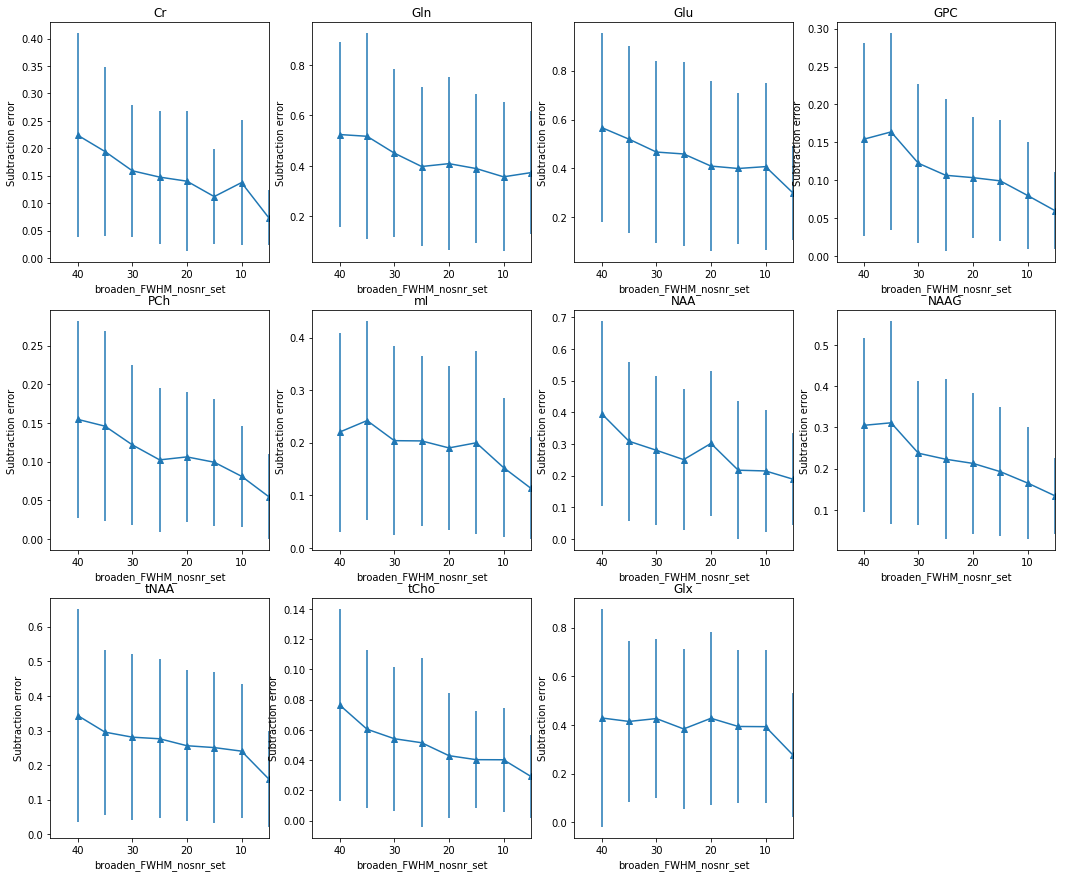

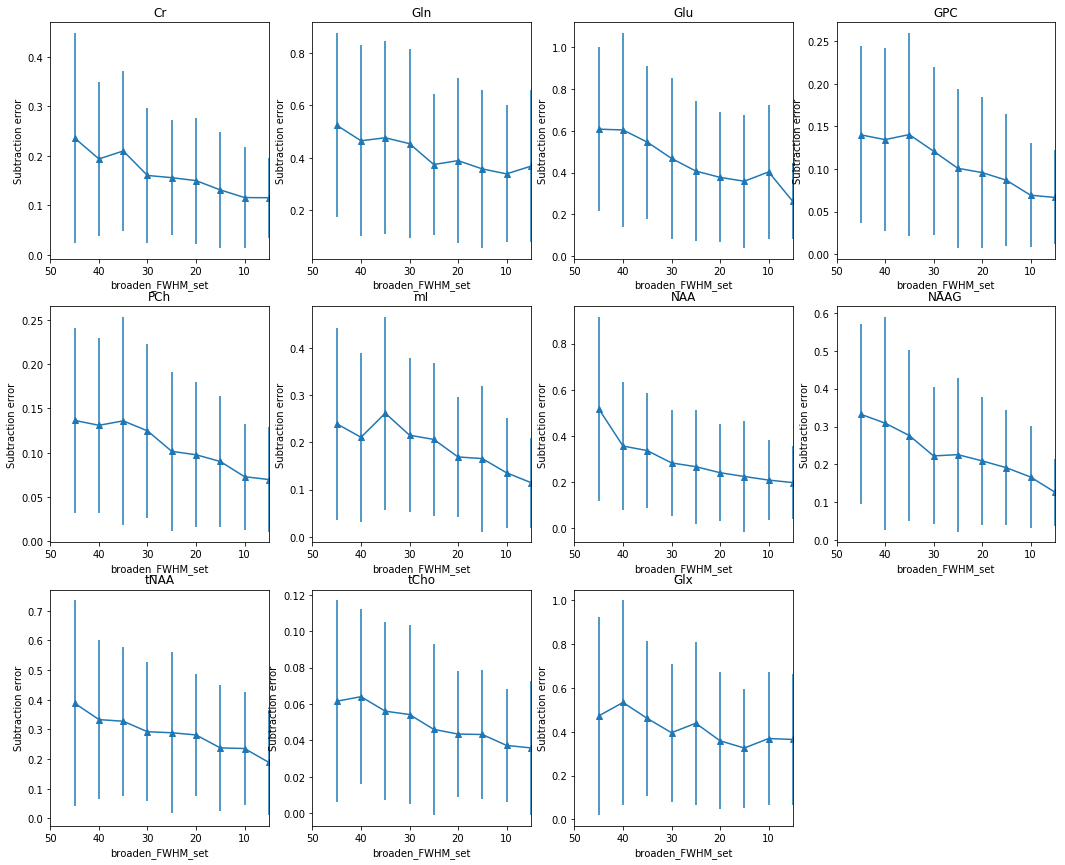

In [70]:
def errorbar_array(x, y):#input np
    #x_label = np.unique(x)#5000 => N種
    x_label = np.unique(np.ceil(x/5)*5)#5000 => N種,在 FWHM情況下將橫軸以差距5來區分
    y_mean_set = np.zeros(len(x_label),)
    y_std_set = np.zeros(len(x_label),)
    for idx,cont in enumerate(x_label):
        label_idx = np.where(x == x_label[idx])
        y_value = y[label_idx]
        y_mean_set[idx],y_std_set[idx] = np.mean(y_value), np.std(y_value)
    return x_label,y_mean_set,y_std_set

'''
plt.figure()
plt.hist(boarden_t2_set,bins=30)
plt.figure()
plt.hist(AWGN_db_set)
'''
boarden_t2_train, boarden_t2_test, AWGN_db_train , AWGN_db_test = train_test_split(boarden_t2_set, AWGN_db_set, test_size = 0.1, random_state = 42)
FWHM_nosnr_train, FWHM_nosnr_test, FWHM_train , FWHM_test = train_test_split(broaden_FWHM_nosnr_set, broaden_FWHM_set, test_size = 0.1, random_state = 42)

target = ['Cr','Gln','Glu','GPC','PCh','mI','NAA','NAAG','tNAA','tCho','Glx']
metabo_idx = []
for i in target:
    metabo_idx.append(add_metabo_index.index(i))
print(metabo_idx)
'''
for idx,cont in enumerate(metabo_idx):
    plt.figure(1,figsize=(18,15))
    plt.subplot(3,4,idx+1)
    plt.title(add_metabo_index[cont])
    #plt.plot(boarden_t2_test, abs(SE_set.iloc[cont]),'.')
    x_label, y_mean_set, y_std_set = errorbar_array(boarden_t2_test, np.array(abs(SE_set.iloc[cont])))
    plt.errorbar(x_label, y_mean_set, y_std_set, marker='^')    
    plt.xlabel('Boarden_t2')
    plt.ylabel('Subtraction error')
    #plt.legend(loc='upper left')
    
    #############################
    plt.figure(2,figsize=(18,20))
    plt.subplot(4,4,idx+1)
    plt.title(add_metabo_index[cont])
    x_label, y_mean_set, y_std_set = errorbar_array(AWGN_db_test, np.array(abs(SE_set.iloc[cont])))
    plt.errorbar(x_label, y_mean_set, y_std_set, marker='^')    
    #plt.plot(AWGN_db_test, abs(SE_set.iloc[cont]),'.')
    plt.xlabel('SNR')
    plt.ylabel('Subtraction error')
    #plt.legend(loc='upper left')
'''
#plt.plot(broaden_FWHM_nosnr_set, broaden_FWHM_set)
for idx,cont in enumerate(metabo_idx):
    plt.figure(1,figsize=(18,15))
    plt.subplot(3,4,idx+1)
    plt.title(add_metabo_index[cont])
    #plt.plot(boarden_t2_test, abs(SE_set.iloc[cont]),'.')
    x_label, y_mean_set, y_std_set = errorbar_array(FWHM_nosnr_test, np.array(abs(SE_set.iloc[cont])))
    plt.errorbar(x_label, y_mean_set, y_std_set, marker='^')    
    plt.xlabel('broaden_FWHM_nosnr_set')
    plt.ylabel('Subtraction error')
    plt.xlim(x_label.max(),x_label.min())
    #plt.legend(loc='upper left')
    
    #############################
    plt.figure(2,figsize=(18,20))
    plt.subplot(4,4,idx+1)
    plt.title(add_metabo_index[cont])
    x_label, y_mean_set, y_std_set = errorbar_array(FWHM_test, np.array(abs(SE_set.iloc[cont])))
    plt.errorbar(x_label, y_mean_set, y_std_set, marker='^')    
    #plt.plot(AWGN_db_test, abs(SE_set.iloc[cont]),'.')
    plt.xlabel('broaden_FWHM_set')
    plt.ylabel('Subtraction error')
    plt.xlim(x_label.max(),x_label.min())    
    #plt.legend(loc='upper left')

In [133]:
brain_metabo_index =  brain_conc_set[0].index
pd_conc_table_test =  pd.DataFrame(conc_table_test).T
pd_conc_table_test = pd_conc_table_test.set_index(brain_metabo_index)

add_metabo_index = brain_metabo_index[:-2]
add_metabo_index = list(add_metabo_index)
add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tNAA','mI/tNAA','tCho/tNAA','tCr/tNAA'])

print(add_metabo_index)
C = pd_conc_table_test[:-2]
C_set = pd.DataFrame(data=np.zeros([len(add_metabo_index),C.shape[1]]), index=add_metabo_index)

C_set.iloc[:13] = C


C_set.iloc[13] = C_set.iloc[11] + C_set.iloc[12]
C_set.iloc[14] = C_set.iloc[2]
C_set.iloc[15] = C_set.iloc[8] + C_set.iloc[7]
C_set.iloc[16] = C_set.iloc[5] + C_set.iloc[6]
C_set.iloc[17] = C_set.iloc[16] / C_set.iloc[13]
C_set.iloc[18] = C_set.iloc[10] / C_set.iloc[13]
C_set.iloc[19] = C_set.iloc[15] / C_set.iloc[13]
C_set.iloc[20] = C_set.iloc[14] / C_set.iloc[13]
#C_set = C_set/C_set.iloc[2]
C_set = C_set.loc[["Cr",'NAA','NAAG', "Glu","mI","tNAA","tCr","tCho","Glx"]]
print(C_set.T)

#dump_path = os.path.join(working_dir, 'simulated_data_conc_groundtruth.csv')
#C_set.T.to_csv(dump_path)



['Ala', 'Asp', 'Cr', 'GABA', 'Glc', 'Gln', 'Glu', 'GPC', 'PCh', 'Lac', 'mI', 'NAA', 'NAAG', 'tNAA', 'tCr', 'tCho', 'Glx', 'Glx/tNAA', 'mI/tNAA', 'tCho/tNAA', 'tCr/tNAA']
             Cr        NAA      NAAG        Glu        mI       tNAA  \
0      9.148880  15.645340  0.646007   9.176295  5.435544  16.291347   
1      4.555516  13.946374  0.660400   9.082272  6.938520  14.606774   
2      6.849487  11.671515  2.154396   9.833447  4.555659  13.825911   
3      6.523049  10.612312  0.701303  10.477128  4.427997  11.313615   
4      5.608098  15.337318  1.282572   7.591620  6.714305  16.619889   
5      7.642569  13.872513  0.670694   7.737995  4.630401  14.543207   
6      6.368525   7.586865  0.688449   7.357495  7.939372   8.275313   
7      7.535355   7.924278  0.686610  10.888874  4.800976   8.610888   
8      9.790636  12.889672  1.046581   7.282851  4.504132  13.936253   
9      9.512997  13.569318  2.322109  12.496224  6.583785  15.891427   
10     9.390274   9.003334  2.434247  

# Phantom
## Read data and averge

## Measure Hz and freq_shift_correction

In [138]:
def measure_width_hz(ppm, spectrum_data):
    if (spectrum_data.ndim == 2):
        spectrum_data = spectrum_data[:,0]
    tNAA_pos = np.where((ppm>=1.8) & (ppm<=2.2))
    tNAA_crop = spectrum_data[tNAA_pos]
    #tNAA_FWHM_val = max(tNAA_crop)*0.2
    tNAA_FWHM_val = max(tNAA_crop)*(1-0.707)
    tNAA_FWHM = np.where(tNAA_crop > tNAA_FWHM_val)
    tNAA_FWHM_width_ppm = max(ppm[tNAA_pos][tNAA_FWHM])-min(ppm[tNAA_pos][tNAA_FWHM])
    #ppm to Hz, (BW)/(total ppm = BW/B) * width_ppm = B*width_ppm
    tNAA_FWHM_width_hz = round(123.177*tNAA_FWHM_width_ppm, 3)
    return tNAA_FWHM_width_hz
#print('measure_width_hz',measure_width_hz(ppm, avg_ws_datasets_val))

def freq_shift_corr(ppm, spectrum_data):
    #print('spectrum_data.shape',spectrum_data.shape)
    tNAA_pos = np.where((ppm>=1.5) & (ppm<=2.5))
    NAA_peak_pos = np.array(np.where((spectrum_data == max(spectrum_data[tNAA_pos]))))[0]
    if len(NAA_peak_pos) > 1:
        NAA_peak_pos = int(NAA_peak_pos[0])
    ppm_2 = (np.abs(ppm - 2.0)).argmin()#The number was the cloest one to 2 ppm
    diff = NAA_peak_pos - ppm_2
    shift_point = NAA_peak_pos - ppm_2
    shift_correction = np.roll(spectrum_data,-shift_point)
    return shift_correction

def measure_peak_phase(ppm,nws_data, corr_spectrum):
    before_corr = nws_data
    origin_peak_pos = np.argmax(before_corr.real)
    return corr_spectrum[origin_peak_pos].imag

def measure_peak_area(ppm,nws_data, corr_spectrum):
    before_corr = nws_data
    origin_peak_pos = np.argmax(before_corr.real)
    origin_peak_range = np.where((ppm >= 4) & (ppm <= 5))
    area = np.sum(corr_spectrum[origin_peak_range].real)*abs(ppm[0]-ppm[1])
    return area

def cal_area(ppm, spectrum):
    spectrum_max = spectrum.real.max()
    area_threadshold = spectrum_max*(1-0.99)
    area_pos_range = np.where(spectrum >= area_threadshold)
    area_pos_range_byppm = np.where((ppm >= 4) & (ppm <= 5))
    print('Points in Area:',len(area_pos_range_byppm[0]))
    area_range = spectrum[area_pos_range]
    area = round(np.sum(area_range).real*abs(ppm[0]-ppm[1]), 5)#print('Area by threadshold = %E' %area)
    area_byppm = round(np.sum(spectrum[area_pos_range_byppm].real)*abs(ppm[0]-ppm[1]), 5)
    abs_area = round(np.sum(abs(area_range.real))*abs(ppm[0]-ppm[1]), 5)#Area by threadshold_ABS
    total_area = round(np.sum(spectrum).real*abs(ppm[0]-ppm[1]), 5)#All spectrum area
    total_area_abs = round(np.sum(abs(spectrum.real))*abs(ppm[0]-ppm[1]), 5)#All spectrum area ABS
    print('ppm_gap', ppm[0]-ppm[1])
    print('Spectrum area byppm = %E' %area_byppm)
    plt.figure()
    plt.title('Spectrum area byppm = %E' %area_byppm)
    plt.plot(ppm,spectrum)
    plt.plot(ppm[area_pos_range_byppm],spectrum[area_pos_range_byppm],color='r')
    plt.xlim(5.1,3.9)
    return area_byppm

###########################Zero-phase correction###########################
def zero_phase_corr(nws_data):    
    FT_M = np.abs(nws_data)
    FT_P = np.angle(nws_data, deg=True)
    var_phi_range = np.arange(-180, 180)
    phase_val = np.zeros([len(var_phi_range)])
    area_val = np.zeros([len(var_phi_range)])

    ######Find phase min######
    for idx, var_phi in enumerate(var_phi_range):
        angle = var_phi
        new_phase = FT_P + angle
        new_spectrum = nws_data * 0
        new_theada = new_phase * (np.pi / 180)
        new_spectrum = np.multiply(FT_M , np.cos(new_theada)) + 1j*np.multiply(FT_M , np.sin(new_theada))
        phase_val[idx] = abs(measure_peak_phase(ppm,nws_data, new_spectrum))
        area_val[idx] = measure_peak_area(ppm,nws_data, new_spectrum)
    #angle = var_phi_range[np.argmin(abs(phase_val))]
    #print('(phase_val)',(phase_val).min())
    angle = var_phi_range[np.argmax(area_val)]

    new_phase = FT_P + angle#FT_P = 52.96096145 角度
    new_theada = new_phase * (np.pi / 180)#iF angle = 0, new theada = 0.9 ..... 逕度 為了要丟下面的cos?
    print('angle',angle)

    new_spectrum = nws_data * 0
    new_spectrum = np.multiply(FT_M , np.cos(new_theada)) + 1j*np.multiply(FT_M , np.sin(new_theada))
    return new_spectrum
###########################Zero-phase correction###########################

## SNR Part

files ['NSA_8.npz', 'NSA_16.npz', 'NSA_24.npz', 'NSA_32.npz', 'NSA_40.npz', 'NSA_48.npz', 'NSA_56.npz', 'NSA_64.npz', 'nws_data.npz']


HBox(children=(IntProgress(value=0, max=9), HTML(value='')))

C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)



naa_cord len 63
interpo_x[0]-interpo_x[1] 0.004777164271009049
angle 19
Points in Area: 130
ppm_gap 0.007693224961435874
Spectrum area byppm = 7.007717E+06


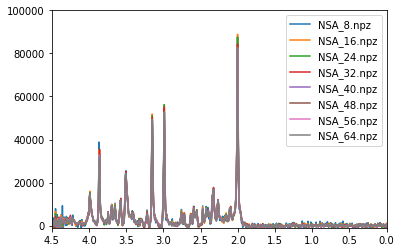

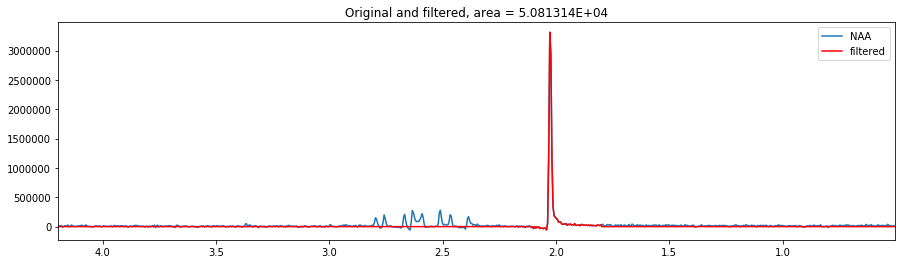

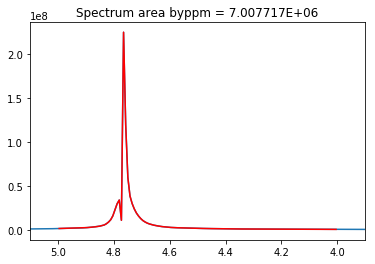

In [5]:
import time
from tqdm import tnrange, tqdm_notebook
import pandas as pd

working_dir = os.getcwd()
phantom_to_model_path = os.path.join(working_dir, 'phantom_to_model')

ws_NSA_datasets = np.zeros((8,2048,),dtype=np.csingle)
nws_data = np.zeros((1,2048,),dtype=np.csingle)

files = [ f for f in os.listdir(phantom_to_model_path) if os.path.isfile(os.path.join(phantom_to_model_path,f)) ]
files = sorted(files, key=lambda x: x[-7])#倒數三個不看
print('files',files)

count = 0
plt.figure()
for idx, cont in enumerate(tqdm_notebook(files)):
    if cont == 'nws_data.npz':
        read_data= np.load(os.path.join(phantom_to_model_path, cont))
        ppm = read_data['ppm']
        nws_data = read_data['X']
    else:
        read_data= np.load(os.path.join(phantom_to_model_path, cont))
        ppm = read_data['ppm']
        ppm_2048 = ppm
        ws_read_data = read_data['X']
        if ws_read_data.ndim == 2:
            ws_read_data = ws_read_data[:,0]
        ws_NSA_datasets[idx,:] = ws_read_data
        plt.plot(ppm, ws_NSA_datasets[idx,:],label=f'{files[idx]}')
        plt.xlim(4.5,0)
        plt.ylim(-1000,100000)
        plt.legend(loc='upper right')

##########################################Basis filter#########################################
#################To get NAA singlet 2.0 ppm Peak 1 mole Area#################
rd = np.load(os.path.join(working_dir,'42ppm_base_basis_set.npz'))
#rd = np.load(os.path.join(working_dir,'gamma_42ppm_base_basis_set.npz'))
base_basis_set = rd['data']

read_data= np.load(os.path.join(phantom_to_model_path, files[0]))
ppm = read_data['ppm']
pos = np.where((ppm>=0.5) & (ppm<=4.2))
crop_ppm = ppm[pos]
#interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],837)
interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],774)
#interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],467)

brain_metabo_index =  brain_conc_set[0].index
add_metabo_index = brain_metabo_index[:-2]
add_metabo_index = list(add_metabo_index)
#add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tNAA','mI/tNAA','tCho/tNAA','tCr/tNAA'])

water_conc = 55556

denoise_basis_set = base_basis_set*0
#plt.figure(figsize = (15,10))
for i in range(len(base_basis_set)):
    #thd = np.quantile(base_basis_set[i].real, .90)
    denoise_basis_set[i]  = base_basis_set[i]
    #denoise_basis_set[i][denoise_basis_set[i] < thd] = 0
    #LCModel basis
    if i ==11:#11 = NAA
        denoise_basis_set[i] = denoise_basis_set[i]*0
        naa_cord = np.where((interpo_x>1.8)&(interpo_x<2.1))
        denoise_basis_set[i][naa_cord] = base_basis_set[i][naa_cord]
        naa_area = np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])
        w_area = naa_area *55556 * (2/3)
        print('naa_cord len',len(naa_cord[0]))
        print('interpo_x[0]-interpo_x[1]',interpo_x[0]-interpo_x[1])
        #print('w_area (naa_area *55556 * (2/3)) =', w_area)
        ##########Visualize spectra##########
        plt.figure(figsize=(15,4))
        plt.title('Original and filtered, area = %E' %(np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])))
        plt.plot(interpo_x,base_basis_set[i],label = add_metabo_index[i])
        plt.plot(interpo_x, denoise_basis_set[i], color='r',label = 'filtered')
        plt.xlim(interpo_x.max(),interpo_x.min())
        plt.legend(loc='upper right')
        
    '''    
    #gamma basis
    if i ==12:#11 = NAA
        denoise_basis_set[i] = denoise_basis_set[i]*0
        naa_cord = np.where((interpo_x>1.8)&(interpo_x<2.1))
        denoise_basis_set[i][naa_cord] = base_basis_set[i][naa_cord]
        naa_area = np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])
        w_area = naa_area *55556 * (2/3)
        print('naa_cord len',len(naa_cord[0]))
        print('interpo_x[0]-interpo_x[1]',interpo_x[0]-interpo_x[1])
        #print('w_area (naa_area *55556 * (2/3)) =', w_area)
        ##########Visualize spectra##########
        plt.figure(figsize=(15,4))
        plt.title('Original and filtered, area = %E' %(np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])))
        plt.plot(interpo_x,base_basis_set[i],label = add_metabo_index[i])
        plt.plot(interpo_x, denoise_basis_set[i], color='r',label = 'filtered')
        plt.xlim(interpo_x.max(),interpo_x.min())
        plt.legend(loc='upper right')
    '''
        
##########################################Basis filter#########################################

########################算NWS 面積囉######################
new_spectrum = zero_phase_corr(nws_data)
abs_real_NWS_area = cal_area(ppm, abs(new_spectrum.real))
########################得NWS 面積########################

norm_coefficient_real 268.55868235177905


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


X_input shape: (2, 774, 1), pred_res shape: (2, 774)
0
X_input (2, 774, 1)
1
X_input (2, 774, 1)
add_metabo_index
[[0, 'Ala'], [1, 'Asp'], [2, 'Cr'], [3, 'GABA'], [4, 'Glc'], [5, 'Gln'], [6, 'Glu'], [7, 'GPC'], [8, 'PCh'], [9, 'Lac'], [10, 'mI'], [11, 'NAA'], [12, 'NAAG'], [13, 'tNAA'], [14, 'tCr'], [15, 'tCho'], [16, 'Glx'], [17, 'Glx/tCr'], [18, 'mI/tCr'], [19, 'tCho/tCr'], [20, 'tNAA/tCr'], [21, 'tCr/tCr']]
##############Directly subtraction##############
real_conc
Cr       5.717962
Glu      6.423092
Gln      3.396589
NAA     11.489465
NAAG     0.011788
mI       4.043199
tNAA    11.501253
tCho     1.678971
Glx      9.819681
Name: 1, dtype: float32
/Cr
tNAA/tCr    2.011425
tCr/tCr     1.000000
tCho/tCr    0.293631
mI/tCr      0.707105
Glx/tCr     1.717339
Name: 1, dtype: float32


'\nThe metabolite conc. in phantom report in literature are\nNAA: 12.5 mM\nCr: 10 mM\nCho: 3 mM\nmI: 7.5 mM\nGlu: 12.5 mM\n\n/Cr\nNAA: 1.25\nCr: 1\nCho: 0.3\nmI: 0.75\nGlu: 1.25\n\n'

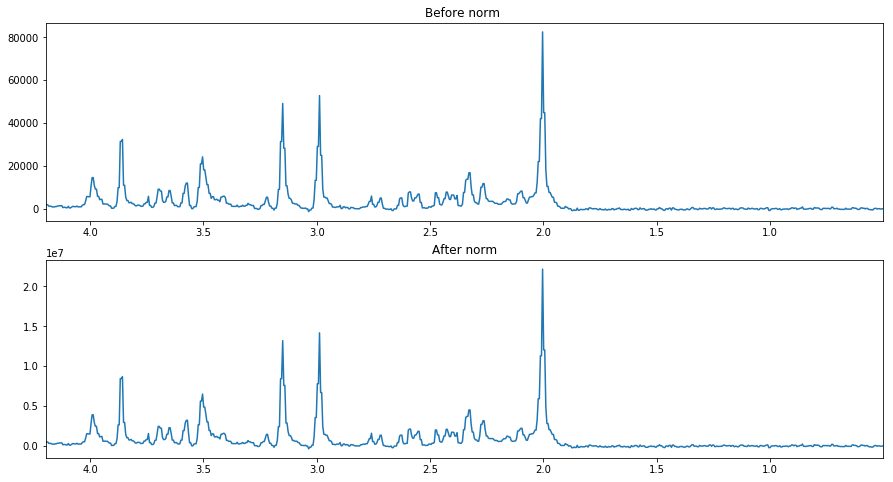

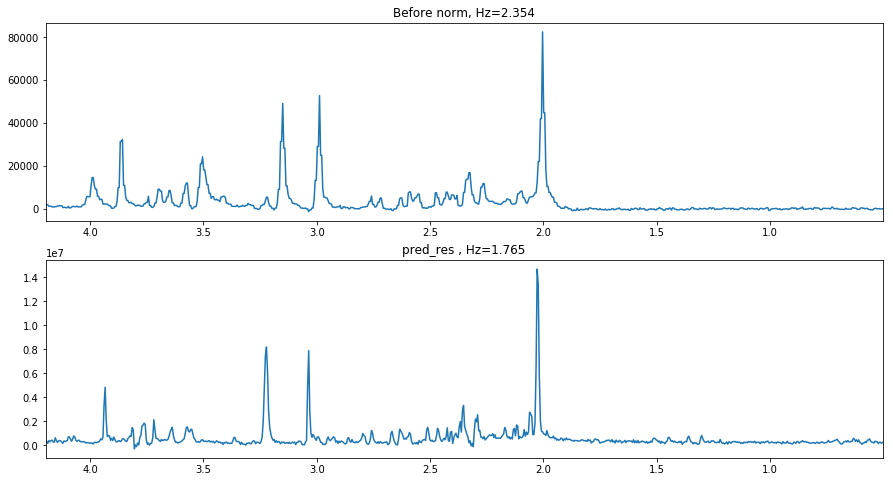

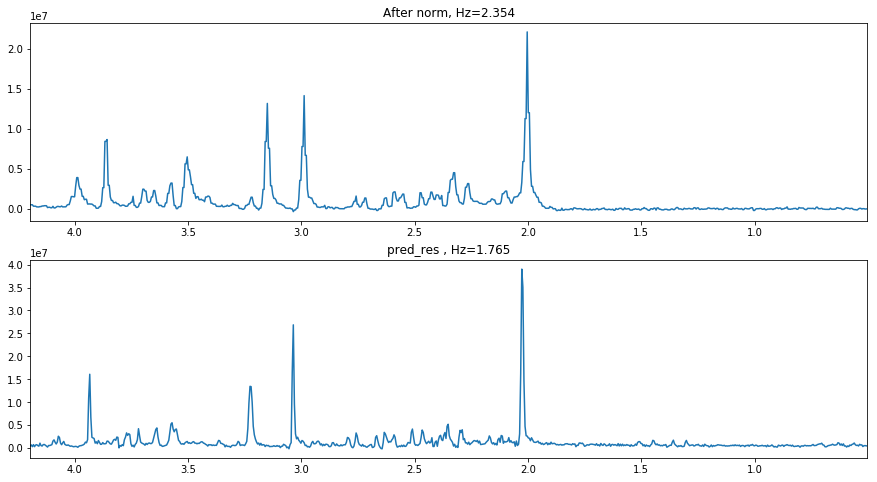

In [6]:
#measure NAA basis
rd = np.load(os.path.join(working_dir,'42ppm_base_basis_set.npz'))
#rd = np.load(os.path.join(working_dir,'gamma_42ppm_base_basis_set.npz'))

base_basis_set = rd['data']

# try multiply 10^7
# NSA = 64
NSA_64_ori = ws_NSA_datasets[-1,:]

#pos = np.where((ppm>=0.5) & (ppm<=4.5))
pos = np.where((ppm>=0.5) & (ppm<=4.2))
crop_ppm = ppm[pos]
NSA_64_ori = NSA_64_ori[pos]


#norm_coefficient_real = 1.99E+02
#abs_real_NWS_area = abs_real_NWS_area*2
norm_coefficient_real = w_area / abs_real_NWS_area
#norm_coefficient_real = w_area / (abs_real_NWS_area*4)
norm_coefficient_imag = norm_coefficient_real
print('norm_coefficient_real',norm_coefficient_real)

#NSA_64_ori = ((NSA_64_ori.real) * norm_coefficient_real) + 1j*((NSA_64_ori.imag) * norm_coefficient_imag)

#############interpolation
import scipy as scipy
from scipy import interpolate

x = crop_ppm
interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],774)
#interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],467)

real_f = interpolate.interp1d(x,NSA_64_ori.real,kind="nearest")
imag_f = interpolate.interp1d(x,NSA_64_ori.imag,kind="nearest")
interpo_NSA_64_ori = real_f(interpo_x) + 1j*(imag_f(interpo_x))
#############interpolation

plt.figure(figsize=(15,8))
plt.subplot(211)
plt.title('Before norm ')
plt.plot(interpo_x,interpo_NSA_64_ori)
plt.xlim(interpo_x.max(),interpo_x.min())

norm_NSA_64_ori = ((interpo_NSA_64_ori.real) * norm_coefficient_real) + 1j*((interpo_NSA_64_ori.imag) * norm_coefficient_imag)
#norm_NSA_64_ori = ((interpo_NSA_64_ori.real) / norm_coefficient_real) + 1j*((interpo_NSA_64_ori.imag) / norm_coefficient_imag)
#norm_NSA_64_ori = interpo_NSA_64_ori
norm_NSA_64_ori = np.expand_dims(norm_NSA_64_ori, axis = 1)

plt.subplot(212)
plt.title('After norm')
plt.plot(interpo_x,norm_NSA_64_ori)
plt.xlim(interpo_x.max(),interpo_x.min())

###############################################################################
interpo_NSA_64_ori = np.expand_dims(interpo_NSA_64_ori, axis = 1)
compare_NSA64_norm = np.append(interpo_NSA_64_ori.real, norm_NSA_64_ori.real,axis = 1)

X_input = np.expand_dims(compare_NSA64_norm.T,axis = 2)#NSA data

pred_res = model.predict(X_input, verbose=0)

print(f'X_input shape: {X_input.shape}, pred_res shape: {pred_res.shape}')

input_name = ['Before norm', 'After norm']

# Visualize the predicton result
for num in range(len(X_input)):
    plt.figure(figsize=(15,8))
    print(num)
    plt.subplot(211)
    plt.title(f'{input_name[num]}, Hz={measure_width_hz(interpo_x, X_input[num])}')
    print('X_input',X_input.shape)
    plt.plot(interpo_x,X_input[num])
    plt.xlim(interpo_x.max(),interpo_x.min())
    plt.subplot(212)
    #print(pred_res[num].shape)
    plt.title(f'pred_res , Hz={measure_width_hz(interpo_x, pred_res[num])}')
    plt.plot(interpo_x,pred_res[num])
    plt.xlim(interpo_x.max(),interpo_x.min())
    
# Solve matrix problem to quantification
#NORM_PRED = pred_res[1]
#print('NORM_PRED',NORM_PRED.shape)
#NORM_PRED = (NORM_PRED.real/norm_coefficient_real) +1j*(NORM_PRED.imag/norm_coefficient_imag)

brain_metabo_index =  brain_conc_set[0].index
add_metabo_index = brain_metabo_index[:-2]
add_metabo_index = list(add_metabo_index)
#add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tCr','mI/tCr','tCho/tCr','tCr/tCr'])
add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tCr','mI/tCr','tCho/tCr','tNAA/tCr','tCr/tCr'])

C_set = pd.DataFrame(data=np.zeros([len(add_metabo_index),len(pred_res)]), index=add_metabo_index)
pinv_b = np.linalg.pinv(denoise_basis_set.real)
print('add_metabo_index')
print ([list((i, add_metabo_index[i])) for i in range(len(add_metabo_index))]) 
pd.set_option('display.max_columns', None)

pinv_b = np.linalg.pinv(base_basis_set.real)


#for LCM basis
for i in (range(len(pred_res))):
    C = np.matmul(pred_res[i].real, pinv_b)
    #tNAA = NAA + NAAG, [11] + [12]
    C = np.append(C, C[11]+C[12])
    #tCr = Cr + PCr, [2]+[NA]
    C = np.append(C, C[2])
    #tCho = PC + GPC, [8]+[7]
    C = np.append(C, C[8]+C[7])
    #Glx = (Gln + Glu), [5]+[6]
    C = np.append(C, C[5]+C[6])
    #'Glx/tCr' = [16]/[14]
    C = np.append(C, C[16]/C[14])
    #'mI/tCr' = [10]/[14]
    C = np.append(C, C[10]/C[14])    
    #'tCho/tCr' = [15]/[14]
    C = np.append(C, C[15]/C[14])
    #'tNAA/tCr' = [13]/[14]
    C = np.append(C, C[13]/C[14])
    #'tCr/tCr' = [14]/[14]
    C = np.append(C, C[14]/C[14])    
    #C_set[i] = C/C[2]
    C_set[i] = C

'''
#For gamma basis
#[[0, 'Ala'], [1, 'Asp'], [2, 'Cr'], [3, 'PCr'], [4, 'GABA'], [5, 'Glc'], [6, 'Gln'], 
#[7, 'Glu'], [8, 'GPC'], [9, 'PCh'], [10, 'mI'], [11, 'Lac'], [12, 'NAA'], [13, 'NAAG'], 
#[14, 'tNAA'], [15, 'tCr'], [16, 'tCho'], [17, 'Glx'], [18, 'Glx/tCr'], [19, 'mI/tCr'], 
#[20, 'tCho/tCr'], [21, 'tNAA/tCr'], [22, 'tCr/tCr']]


for i in (range(len(pred_res))):
    C = np.matmul(pred_res[i].real, pinv_b)
    #tNAA = NAA + NAAG, [12] + [13]
    C = np.append(C, C[12]+C[13])
    #tCr = Cr + PCr, [2]+[3]
    C = np.append(C, C[2]+C[3])
    #tCho = PC + GPC, [8]+[9]
    C = np.append(C, C[8]+ C[9])
    #Glx = (Gln + Glu), [5]+[6]
    C = np.append(C, C[6]+C[7])
    #'Glx/tCr' = [17]/[15]
    C = np.append(C, C[17]/C[15])
    #'mI/tCr' = [10]/[15]
    C = np.append(C, C[10]/C[15])    
    #'tCho/tCr' = [16]/[15]
    C = np.append(C, C[16]/C[15])
    #'tNAA/tCr' = [14]/[15]
    C = np.append(C, C[14]/C[15])
    #'tCr/tCr' = [15]/[15]
    C = np.append(C, C[15]/C[15])    
    C_set[i] = C

'''

print('##############Directly subtraction##############')
#print(C_set.T.iloc[0] - C_set.T.iloc[1])
#print('##############Subtraction percentage##############')
#print(C_set.T)
#print(C_set.T.describe())

real_conc = C_set[1]

print('real_conc')
print(real_conc.loc[["Cr", "Glu",'Gln','NAA','NAAG',"mI","tNAA","tCho","Glx"]])
#gamma
#print(real_conc.loc[["Cr","PCr","Glu",'Gln','NAA','NAAG',"mI","tNAA","tCho","Glx","tCr"]])
#print(real_conc.loc[['NAA',"Cr","PCr","tCho","mI","Lac","Glu",'Gln','NAAG',"tNAA","Glx","tCr"]])
#print(real_conc)

print('/Cr')
print(real_conc.loc[["tNAA/tCr", "tCr/tCr","tCho/tCr","mI/tCr","Glx/tCr"]])
#cr_ratio = real_conc/real_conc.iloc[2]
#print(cr_ratio.loc[["Cr", "Glu",'Gln','NAA','NAAG',"mI","tNAA","tCho","Glx"]])
'''
The metabolite conc. in phantom report in literature are
NAA: 12.5 mM
Cr: 10 mM
Cho: 3 mM
mI: 7.5 mM
Glu: 12.5 mM

/Cr
NAA: 1.25
Cr: 1
Cho: 0.3
mI: 0.75
Glu: 1.25

'''

## 借比較 original and original * ws scale to LCM

In [78]:
#measure NAA basis
#rd = np.load(os.path.join(working_dir,'42ppm_base_basis_set.npz'))
#base_basis_set = rd['data']

# try multiply 10^7
# NSA = 64
NSA_64_ori = ws_NSA_datasets[-1,:]

#pos = np.where((ppm>=0.5) & (ppm<=4.2))
pos = np.where((ppm>ppm.min()) & (ppm<=ppm.max()))
crop_ppm = ppm[pos]
NSA_64_ori = NSA_64_ori[pos]

#norm_coefficient_real = w_area / abs_real_NWS_area
norm_coefficient_real = 1
norm_coefficient_imag = norm_coefficient_real

print('norm_coefficient_real',norm_coefficient_real)

norm_NSA_64_ori = ((NSA_64_ori.real) * norm_coefficient_real) + 1j*((NSA_64_ori.imag) * norm_coefficient_imag)

plt.figure(figsize=(15,8))
plt.subplot(211)
plt.title('Before norm ')
plt.plot(crop_ppm,NSA_64_ori)
plt.xlim(crop_ppm.max(),crop_ppm.min())

plt.subplot(212)
plt.title('After norm')
plt.plot(crop_ppm,norm_NSA_64_ori)
plt.xlim(crop_ppm.max(),crop_ppm.min())


pad_NORM_PRED = np.zeros([2048,],dtype=np.csingle)

##############################################

'''
#####################ppm config#####################
sample_point = 2048
BW = 2000#Hz
B = 127#3T = 3*42.58= 127MHz
ppm_length = BW/B#16.xx ppm
ppm_center = 4.7
min_bound = ppm_center - (ppm_length)/2
max_bound = ppm_center + (ppm_length)/2
ppm = np.linspace(min_bound, max_bound, sample_point)
ppm = ppm[::-1]#reverse
#####################ppm config#####################
'''
ppm_cord_max = crop_ppm.max()
pad_ppm_idx = abs(ppm - ppm_cord_max).argmin()
print('pad_ppm_idx',pad_ppm_idx)

print('norm_NSA_64_ori[0]',norm_NSA_64_ori[0])

pad_NORM_PRED[pad_ppm_idx:pad_ppm_idx+len(norm_NSA_64_ori)] = norm_NSA_64_ori
pad_NORM_PRED = np.expand_dims(pad_NORM_PRED,axis=1)

#plt.figure(figsize=(15,10))
plt.figure(figsize=(15,8))
plt.plot
plt.plot(ppm,pad_NORM_PRED)
plt.xlim(5,0)
#print('ppm[0]-ppm[1]',ppm[0]-ppm[1])
print('len(pad_NORM_PRED)',(pad_NORM_PRED).shape)

# SAVE TO MAT
working_dir = os.getcwd()
dump_path = os.path.join(working_dir, 'try_norm_pred_lcm')
'''
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.title('sdata real')
plt.plot(ppm,pad_NORM_PRED.real)
plt.subplot(212)
plt.title('sdata imag')
plt.plot(ppm,pad_NORM_PRED.imag)
'''

import scipy.io as sio
sio.savemat(os.path.join(dump_path,'snr_01','ws','meas_svs.mat'), {'sdata':pad_NORM_PRED})
# For no nws
#sio.savemat(os.path.join(dump_path,'nonws_snr_01','ws','meas_svs.mat'), {'sdata':pad_NORM_PRED})

norm_coefficient_real 1


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


pad_ppm_idx 0
norm_NSA_64_ori[0] (302.57983+643.70776j)
len(pad_NORM_PRED) (2048, 1)


## If deconv. original spectrum directly...?

norm_coefficient_real 8.176223699133582e-08


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


X_input shape (2, 467, 1)
0
X_input (2, 467, 1)
1
X_input (2, 467, 1)
add_metabo_index
[[0, 'Ala'], [1, 'Asp'], [2, 'Cr'], [3, 'PCr'], [4, 'GABA'], [5, 'Glc'], [6, 'Gln'], [7, 'Glu'], [8, 'GPC'], [9, 'PCh'], [10, 'mI'], [11, 'Lac'], [12, 'NAA'], [13, 'NAAG'], [14, 'tNAA'], [15, 'tCr'], [16, 'tCho'], [17, 'Glx'], [18, 'Glx/tCr'], [19, 'mI/tCr'], [20, 'tCho/tCr'], [21, 'tNAA/tCr'], [22, 'tCr/tCr']]
##############Directly subtraction##############
real_conc
Cr      0.000850
Glu     0.033069
Gln     0.032348
NAA     0.032161
NAAG    0.007336
mI      0.015436
tNAA    0.032572
tCho    0.035679
Glx     0.096819
Name: 1, dtype: float32
/Cr
tNAA/tCr    0.225235
tCr/tCr     1.000000
tCho/tCr    0.026092
mI/tCr      0.473909
Glx/tCr     1.095384
Name: 1, dtype: float32


'\nThe metabolite conc. in phantom report in literature are\nNAA: 12.5 mM\nCr: 10 mM\nCho: 3 mM\nmI: 7.5 mM\nGlu: 12.5 mM\n\n/Cr\nNAA: 1.25\nCr: 1\nCho: 0.3\nmI: 0.75\nGlu: 1.25\n\n'

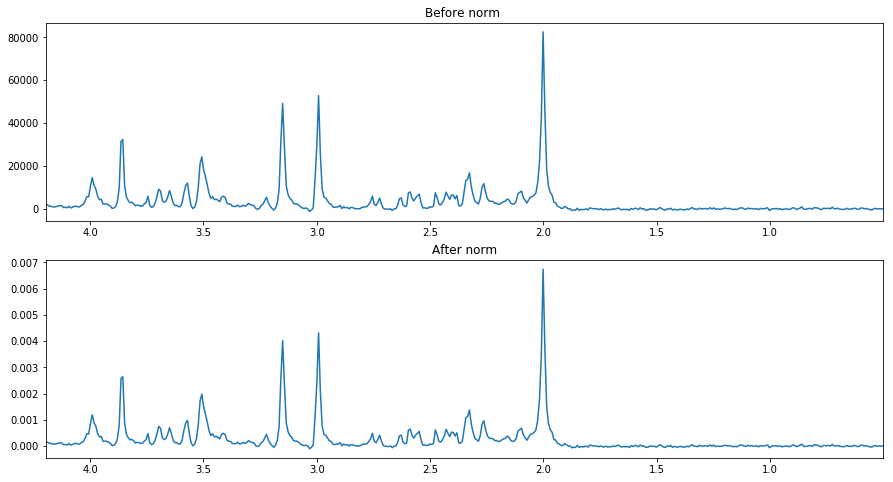

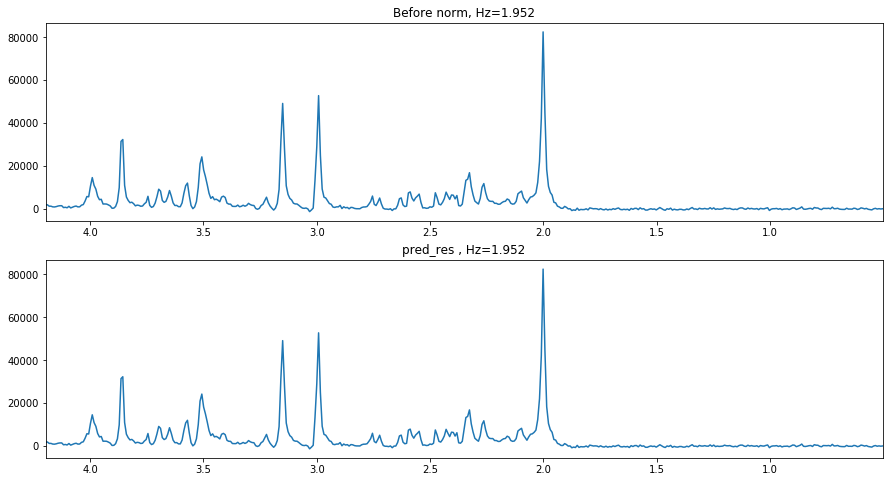

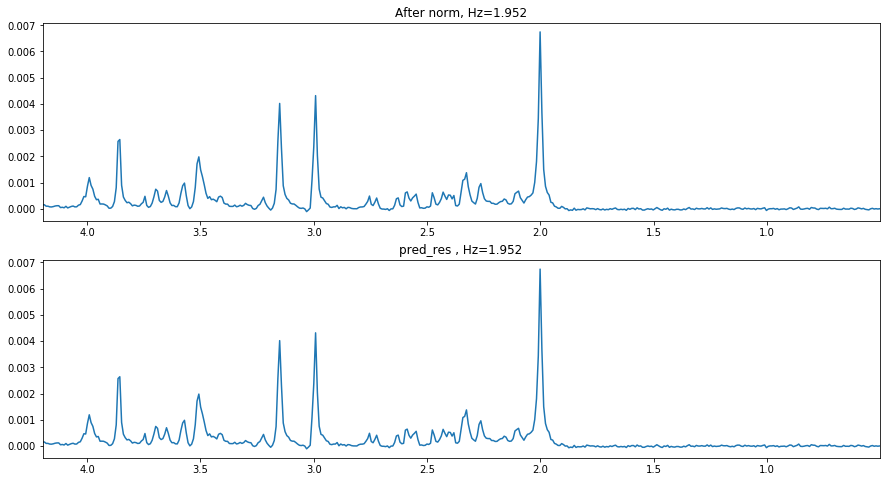

In [260]:
#measure NAA basis
#rd = np.load(os.path.join(working_dir,'42ppm_base_basis_set.npz'))
rd = np.load(os.path.join(working_dir,'gamma_42ppm_base_basis_set.npz'))

base_basis_set = rd['data']

# try multiply 10^7
# NSA = 64
NSA_64_ori = ws_NSA_datasets[-1,:]

#pos = np.where((ppm>=0.5) & (ppm<=4.5))
pos = np.where((ppm>=0.5) & (ppm<=4.2))
crop_ppm = ppm[pos]
NSA_64_ori = NSA_64_ori[pos]


#norm_coefficient_real = 1.99E+02
norm_coefficient_real = w_area / abs_real_NWS_area
norm_coefficient_imag = norm_coefficient_real

print('norm_coefficient_real',norm_coefficient_real)

#############interpolation
import scipy as scipy
from scipy import interpolate

x = crop_ppm
#interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],774)
interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],467)

real_f = interpolate.interp1d(x,NSA_64_ori.real,kind="nearest")
imag_f = interpolate.interp1d(x,NSA_64_ori.imag,kind="nearest")
interpo_NSA_64_ori = real_f(interpo_x) + 1j*(imag_f(interpo_x))
#############interpolation

plt.figure(figsize=(15,8))
plt.subplot(211)
plt.title('Before norm ')
plt.plot(interpo_x,interpo_NSA_64_ori)
plt.xlim(interpo_x.max(),interpo_x.min())

norm_NSA_64_ori = ((interpo_NSA_64_ori.real) * norm_coefficient_real) + 1j*((interpo_NSA_64_ori.imag) * norm_coefficient_imag)
norm_NSA_64_ori = np.expand_dims(norm_NSA_64_ori, axis = 1)

plt.subplot(212)
plt.title('After norm')
plt.plot(interpo_x,norm_NSA_64_ori)
plt.xlim(interpo_x.max(),interpo_x.min())

###############################################################################
interpo_NSA_64_ori = np.expand_dims(interpo_NSA_64_ori, axis = 1)
compare_NSA64_norm = np.append(interpo_NSA_64_ori.real, norm_NSA_64_ori.real,axis = 1)

X_input = np.expand_dims(compare_NSA64_norm.T,axis = 2)#NSA data

#pred_res = model.predict(X_input, verbose=0)
print('X_input shape',X_input.shape)
pred_res = X_input[:,:,0]

input_name = ['Before norm', 'After norm']

# Visualize the predicton result
for num in range(len(X_input)):
    plt.figure(figsize=(15,8))
    print(num)
    plt.subplot(211)
    plt.title(f'{input_name[num]}, Hz={measure_width_hz(interpo_x, X_input[num])}')
    print('X_input',X_input.shape)
    plt.plot(interpo_x,X_input[num])
    plt.xlim(interpo_x.max(),interpo_x.min())
    plt.subplot(212)
    #print(pred_res[num].shape)
    plt.title(f'pred_res , Hz={measure_width_hz(interpo_x, pred_res[num])}')
    plt.plot(interpo_x,pred_res[num])
    plt.xlim(interpo_x.max(),interpo_x.min())
    
# Solve matrix problem to quantification
#NORM_PRED = pred_res[1]
#print('NORM_PRED',NORM_PRED.shape)
#NORM_PRED = (NORM_PRED.real/norm_coefficient_real) +1j*(NORM_PRED.imag/norm_coefficient_imag)

brain_metabo_index =  brain_conc_set[0].index
add_metabo_index = brain_metabo_index[:-2]
add_metabo_index = list(add_metabo_index)
#add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tCr','mI/tCr','tCho/tCr','tCr/tCr'])
add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tCr','mI/tCr','tCho/tCr','tNAA/tCr','tCr/tCr'])

C_set = pd.DataFrame(data=np.zeros([len(add_metabo_index),len(pred_res)]), index=add_metabo_index)
pinv_b = np.linalg.pinv(denoise_basis_set.real)
print('add_metabo_index')
print ([list((i, add_metabo_index[i])) for i in range(len(add_metabo_index))]) 
pd.set_option('display.max_columns', None)

pinv_b = np.linalg.pinv(base_basis_set.real)

#for LCM basis
for i in (range(len(pred_res))):
    C = np.matmul(pred_res[i].real, pinv_b)
    #tNAA = NAA + NAAG, [11] + [12]
    C = np.append(C, C[11]+C[12])
    #tCr = Cr + PCr, [2]+[NA]
    C = np.append(C, C[2])
    #tCho = PC + GPC, [8]+[7]
    C = np.append(C, C[8]+C[7])
    #Glx = (Gln + Glu), [5]+[6]
    C = np.append(C, C[5]+C[6])
    #'Glx/tCr' = [16]/[14]
    C = np.append(C, C[16]/C[14])
    #'mI/tCr' = [10]/[14]
    C = np.append(C, C[10]/C[14])    
    #'tCho/tCr' = [15]/[14]
    C = np.append(C, C[15]/C[14])
    #'tNAA/tCr' = [13]/[14]
    C = np.append(C, C[13]/C[14])
    #'tCr/tCr' = [14]/[14]
    C = np.append(C, C[14]/C[14])    
    #C_set[i] = C/C[2]
    C_set[i] = C

'''
#For gamma basis
#[[0, 'Ala'], [1, 'Asp'], [2, 'Cr'], [3, 'PCr'], [4, 'GABA'], [5, 'Glc'], [6, 'Gln'], 
#[7, 'Glu'], [8, 'GPC'], [9, 'PCh'], [10, 'mI'], [11, 'Lac'], [12, 'NAA'], [13, 'NAAG'], 
#[14, 'tNAA'], [15, 'tCr'], [16, 'tCho'], [17, 'Glx'], [18, 'Glx/tCr'], [19, 'mI/tCr'], 
#[20, 'tCho/tCr'], [21, 'tNAA/tCr'], [22, 'tCr/tCr']]


for i in (range(len(pred_res))):
    C = np.matmul(pred_res[i].real, pinv_b)
    #tNAA = NAA + NAAG, [12] + [13]
    C = np.append(C, C[12]+C[13])
    #tCr = Cr + PCr, [2]+[3]
    C = np.append(C, C[2]+C[3])
    #tCho = PC + GPC, [8]+[9]
    C = np.append(C, C[8]+ C[9])
    #Glx = (Gln + Glu), [5]+[6]
    C = np.append(C, C[6]+C[7])
    #'Glx/tCr' = [17]/[15]
    C = np.append(C, C[17]/C[15])
    #'mI/tCr' = [10]/[15]
    C = np.append(C, C[10]/C[15])    
    #'tCho/tCr' = [16]/[15]
    C = np.append(C, C[16]/C[15])
    #'tNAA/tCr' = [14]/[15]
    C = np.append(C, C[14]/C[15])
    #'tCr/tCr' = [15]/[15]
    C = np.append(C, C[15]/C[15])    
    C_set[i] = C
'''

print('##############Directly subtraction##############')
#print(C_set.T.iloc[0] - C_set.T.iloc[1])
#print('##############Subtraction percentage##############')
#print(C_set.T)
#print(C_set.T.describe())

real_conc = C_set[1]

print('real_conc')
print(real_conc.loc[["Cr", "Glu",'Gln','NAA','NAAG',"mI","tNAA","tCho","Glx"]])

print('/Cr')
print(real_conc.loc[["tNAA/tCr", "tCr/tCr","tCho/tCr","mI/tCr","Glx/tCr"]])
#cr_ratio = real_conc/real_conc.iloc[2]
#print(cr_ratio.loc[["Cr", "Glu",'Gln','NAA','NAAG',"mI","tNAA","tCho","Glx"]])
'''
The metabolite conc. in phantom report in literature are
NAA: 12.5 mM
Cr: 10 mM
Cho: 3 mM
mI: 7.5 mM
Glu: 12.5 mM

/Cr
NAA: 1.25
Cr: 1
Cho: 0.3
mI: 0.75
Glu: 1.25

'''

## To LCM for quantification

NORM_PRED (774,)


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


pad_ppm_idx 1089
NORM_PRED_new[0] (45679290+13513068j)
len(pad_NORM_PRED) 2048


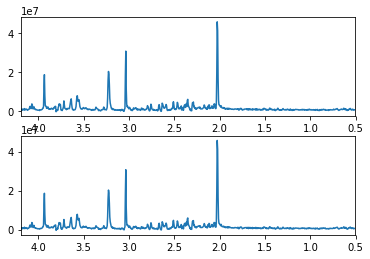

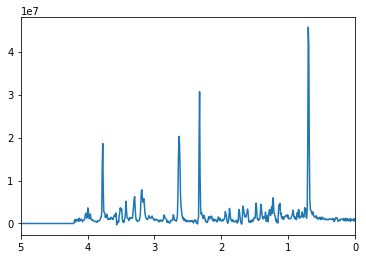

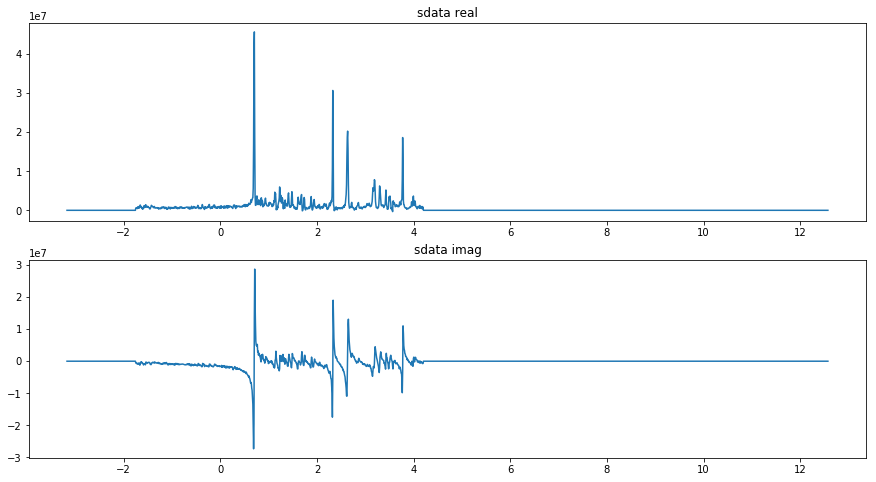

In [41]:
# Case a: 837 xinput 內插回520, 再塞回2048

# Case E: model predict 837,add X_input image, 內插回520,再塞回2048
# Case E-1: model predict 837*2, reshape, 內插回520(real imag 分別內插),再塞回2048
##############################################
#print('norm_coefficient',norm_coefficient)
# NORM_PREDICT
ppm = interpo_x
ppm_cord_max = ppm.max()

NORM_PRED = pred_res[1]
print('NORM_PRED',NORM_PRED.shape)

plt.figure()
plt.subplot(211)
plt.plot(ppm,NORM_PRED)
plt.xlim(ppm.max(),ppm.min())

# 相除
#NORM_PRED = (NORM_PRED.real/norm_coefficient_real) +1j*(NORM_PRED.imag/norm_coefficient_imag)

x = interpo_x

xnew=np.linspace(interpo_x[0],interpo_x[-1],520)
#xnew=np.linspace(interpo_x[0],interpo_x[-1],774)
#NORM_PRED
f_real = interpolate.interp1d(x,NORM_PRED.real,kind="nearest")#["nearest","zero","slinear","quadratic","cubic"]
f_imag = interpolate.interp1d(x,NORM_PRED.imag,kind="nearest")#["nearest","zero","slinear","quadratic","cubic"]

# ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of first, second or third order)
NORM_PRED_new = f_real(xnew) + 1j*(f_imag(xnew))

plt.subplot(212)
plt.plot(xnew,NORM_PRED_new)
plt.xlim(xnew.max(),xnew.min())

from scipy.io import loadmat
working_dir = os.getcwd()
phantom_path = os.path.join(working_dir,'phantom')
origin_ws_path = os.path.join(working_dir,'phantom','snr_01','ws')
pad_NORM_PRED = loadmat(os.path.join(origin_ws_path,'meas_svs.mat'))
pad_NORM_PRED = pad_NORM_PRED['sdata'][:,0]
pad_NORM_PRED = np.zeros([2048,],dtype=np.csingle)

##############################################


#####################ppm config#####################
sample_point = 2048
BW = 2000#Hz
B = 127#3T = 3*42.58= 127MHz
ppm_length = BW/B#16.xx ppm
ppm_center = 4.7
min_bound = ppm_center - (ppm_length)/2
max_bound = ppm_center + (ppm_length)/2
ppm = np.linspace(min_bound, max_bound, sample_point)
ppm = ppm[::-1]#reverse
#####################ppm config#####################

pad_ppm_idx = abs(ppm - ppm_cord_max).argmin()
print('pad_ppm_idx',pad_ppm_idx)

print('NORM_PRED_new[0]',NORM_PRED_new.max())

pad_NORM_PRED[pad_ppm_idx:pad_ppm_idx+len(NORM_PRED_new)] = NORM_PRED_new

#plt.figure(figsize=(15,10))
plt.figure()
plt.plot
plt.plot(ppm,pad_NORM_PRED)
plt.xlim(5,0)
#print('ppm[0]-ppm[1]',ppm[0]-ppm[1])
print('len(pad_NORM_PRED)',len(pad_NORM_PRED))

# SAVE TO MAT
working_dir = os.getcwd()
dump_path = os.path.join(working_dir, 'try_norm_pred_lcm')


plt.figure(figsize=(15,8))
plt.subplot(211)
plt.title('sdata real')
plt.plot(ppm,pad_NORM_PRED.real)
plt.subplot(212)
plt.title('sdata imag')
plt.plot(ppm,pad_NORM_PRED.imag)


#plt.figure(figsize=(15,8))
#plt.title('transform from tdata')
#plt.plot(ppm,np.fft.fft(pad_NORM_PRED_tdata[:,0]))
#plt.xlim(4.4,0.4)


import scipy.io as sio
#sio.savemat(os.path.join(dump_path,'snr_01','ws','meas_svs.mat'), {'sdata':pad_NORM_PRED})


In [155]:
#%matplotlib qt
%matplotlib inline

In [95]:
plt.figure(figsize=(10,6))
plt.xlabel('ppm', fontsize=16)
for i in range(len(base_basis_set)):
    print(i, add_metabo_index[i])
    thd = np.quantile(base_basis_set[i].real, .90)
    denoise_basis_set[i]  = base_basis_set[i]
    #denoise_basis_set[i][denoise_basis_set[i] < thd] = 0
    #plt.figure(figsize=(15,4))
    #plt.title('Original and filtered, area = %E' %(np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])))
    plt.title('Basis spectrum', fontsize=16)
    if i == 2 or i == 11 or i == 12:
        plt.plot(interpo_x,base_basis_set[i],label = add_metabo_index[i])
    else:
        plt.plot(interpo_x,base_basis_set[i],color='gray')
    #plt.plot(interpo_x, denoise_basis_set[i], color='r',label = 'filtered')
    plt.xlim(interpo_x.max(),interpo_x.min())
    plt.legend(loc='upper right',prop={'size': 20})

0 Ala


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


1 Asp


No handles with labels found to put in legend.


2 Cr
3 GABA
4 Glc
5 Gln
6 Glu
7 GPC
8 PCh
9 Lac
10 mI
11 NAA
12 NAAG


## Different TR data

files ['nws_TR800.npz', 'nws_TR1200.npz', 'nws_TR2000.npz', 'nws_TR4000.npz', 'ws_TR800.npz', 'ws_TR1200.npz', 'ws_TR2000.npz', 'ws_TR4000.npz']


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)



ws_TR_datasets (4, 1024)
nws_TR_datasets (4, 1024)


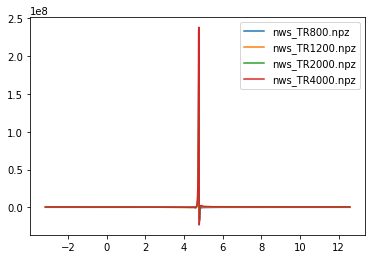

In [12]:
import time
from tqdm import tnrange, tqdm_notebook
import pandas as pd

working_dir = os.getcwd()
phantom_to_model_path = os.path.join(working_dir, 'phantom_TR_to_model')

ws_TR_datasets = np.zeros((4,1024,),dtype=np.csingle)
nws_TR_datasets = np.zeros((4,1024,),dtype=np.csingle)

files = [ f for f in sorted(os.listdir(phantom_to_model_path), key=lambda x: x[:-7]) if os.path.isfile(os.path.join(phantom_to_model_path,f)) ]
print('files',files)

plt.figure()
for idx, cont in enumerate(tqdm_notebook(files)):
    if (idx < 4 ):
        read_data= np.load(os.path.join(phantom_to_model_path, cont))
        ppm = read_data['ppm']
        nws_data = read_data['X']
        nws_TR_datasets[idx,:] = nws_data
        plt.plot(ppm, nws_data, label=files[idx])
        plt.legend(loc='upper right')
    else:
        read_data= np.load(os.path.join(phantom_to_model_path, cont))
        ppm = read_data['ppm']
        ws_read_data = read_data['X']
        if ws_read_data.ndim == 2:
            ws_read_data = ws_read_data[:,0]
        ws_TR_datasets[idx-4,:] = ws_read_data
print('ws_TR_datasets',ws_TR_datasets.shape)
print('nws_TR_datasets',nws_TR_datasets.shape)

len_1024_ppm_0_5_4_5 260


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


norm_coefficient_real 311.9608659716804
norm_coefficient_imag 311.9608659716804
compare_norm_interpo_ws_tr800 (837, 2)
X_input.shape! (2, 837, 1, 1)
X_input.shape!! (2, 837, 1, 2)
pred_res.shape! (2, 1674)
pred_res.shape!! (2, 837)
0
X_input (2, 837, 1)
1
X_input (2, 837, 1)
NORM_PRED (837,)
add_metabo_index ['Ala', 'Asp', 'Cr', 'GABA', 'Glc', 'Gln', 'Glu', 'GPC', 'PCh', 'Lac', 'mI', 'NAA', 'NAAG', 'tNAA', 'tCr', 'tCho', 'Glx', 'Glx/tNAA', 'mI/tNAA', 'tCho/tNAA', 'tCr/tNAA']
        Ala       Asp        Cr      GABA       Glc       Gln        Glu  \
0  0.097123  0.325623  1.539797  0.325623  0.325623  0.976870   1.978570   
1  0.779641  1.976995  9.567946  1.976995  1.976995  5.930987  12.085796   

        GPC       PCh       Lac        mI        NAA      NAAG       tNAA  \
0  0.212473  0.488435  0.094922  1.352155   2.541498  0.237304   2.778802   
1  1.436144  2.965494  0.663987  8.355627  15.722761  1.659968  17.382729   

        tCr      tCho        Glx  Glx/tNAA   mI/tNAA  tCho/

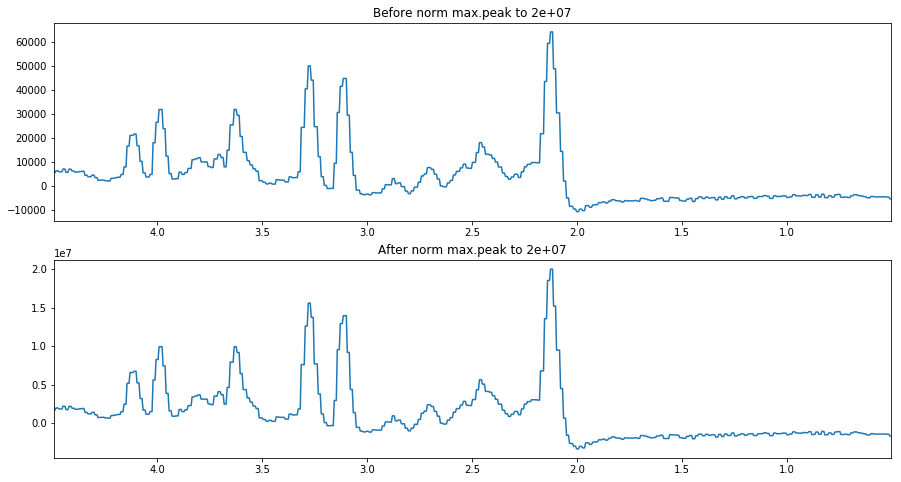

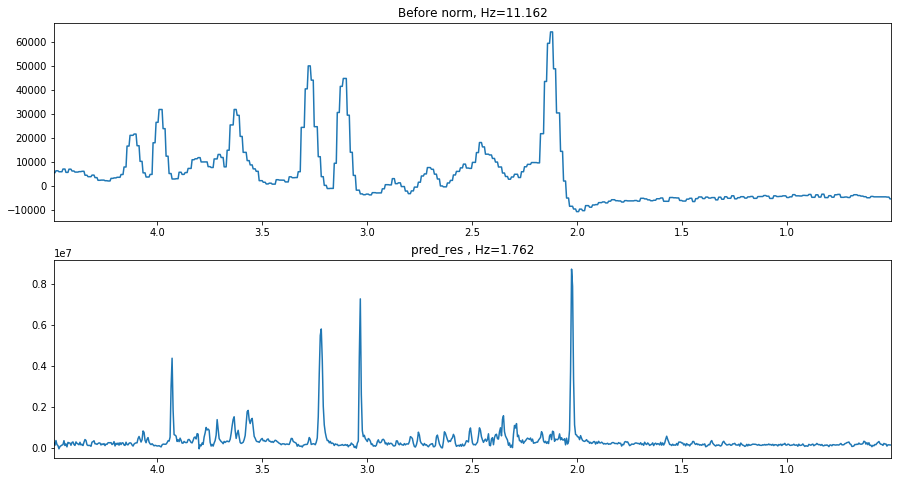

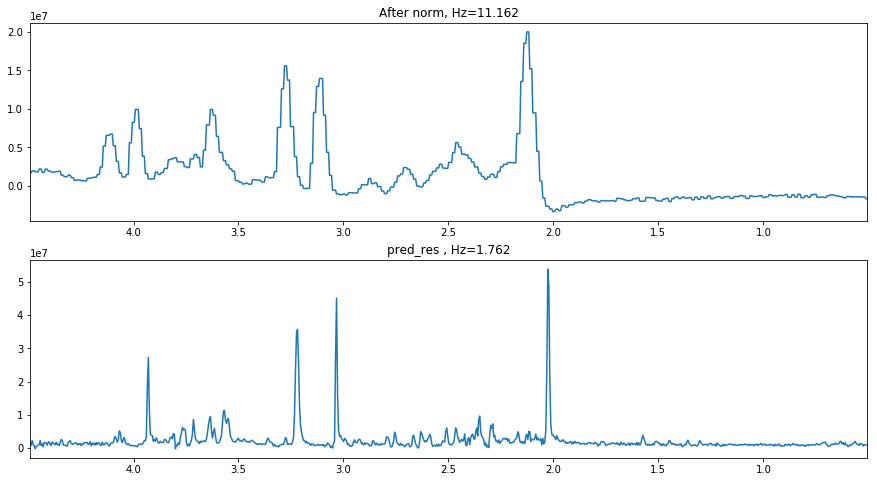

In [36]:
#measure NAA basis
rd = np.load(os.path.join(working_dir,'base_basis_set.npz'))
base_basis_set = rd['data']

read_data= np.load(os.path.join(phantom_to_model_path, 'nws_TR800.npz'))
ppm = read_data['ppm']
ws_tr800 = ws_TR_datasets[3,:]
#ws_tr800 = ws_tr800.real*(-1) +1j*(ws_tr800.imag)*(-1)

pos = np.where((ppm>=0.5) & (ppm<=4.5))
crop_ppm = ppm[pos]
len_1024_ppm_0_5_4_5 = len(crop_ppm)
print('len_1024_ppm_0_5_4_5',len_1024_ppm_0_5_4_5)

ws_tr800 = ws_tr800[pos]

#############interpolation
import scipy as scipy
from scipy import interpolate

x = crop_ppm
interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],837)

real_f = interpolate.interp1d(x,ws_tr800.real,kind="nearest")
imag_f = interpolate.interp1d(x,ws_tr800.imag,kind="nearest")
interpo_ws_tr800 = real_f(interpo_x) + 1j*(imag_f(interpo_x))

#############interpolation

plt.figure(figsize=(15,8))
plt.subplot(211)
plt.title('Before norm max.peak to 2e+07')
plt.plot(interpo_x,interpo_ws_tr800)
plt.xlim(interpo_x.max(),interpo_x.min())


norm_coefficient_real = 2e+07 / interpo_ws_tr800.real.max()
norm_coefficient_imag = 2e+07 / interpo_ws_tr800.real.max()

print('norm_coefficient_real',norm_coefficient_real)
print('norm_coefficient_imag',norm_coefficient_imag)

norm_interpo_ws_tr800 = ((interpo_ws_tr800.real) * norm_coefficient_real) + 1j*((interpo_ws_tr800.imag) * norm_coefficient_imag)
norm_interpo_ws_tr800 = np.expand_dims(norm_interpo_ws_tr800, axis = 1)
#norm_NSA_64_ori = np.expand_dims(interpo_NSA_64_ori, axis = 1)


plt.subplot(212)
plt.title('After norm max.peak to 2e+07')
plt.plot(interpo_x,norm_interpo_ws_tr800)
plt.xlim(interpo_x.max(),interpo_x.min())

###############################################################################
interpo_ws_tr800 = np.expand_dims(interpo_ws_tr800, axis = 1)

compare_norm_interpo_ws_tr800 = np.append(interpo_ws_tr800, norm_interpo_ws_tr800,axis = 1)
print('compare_norm_interpo_ws_tr800',compare_norm_interpo_ws_tr800.shape)#compare_NSA64_norm (837, 2)

X_input = np.expand_dims(compare_norm_interpo_ws_tr800.T,axis = 2)#NSA data
X_input = np.expand_dims(X_input,axis = 3)
print('X_input.shape!',X_input.shape)#X_input.shape (2, 837, 1, 1)
X_input = np.append(X_input.real, X_input.imag, axis = 3)
#X_train: (45000, 837, 1, 2)
print('X_input.shape!!',X_input.shape)#X_input.shape (2, 837, 1, 1)

pred_res = model.predict(X_input, verbose=0)
print('pred_res.shape!',pred_res.shape)
pred_res = pred_res[:,:837] + 1j*(pred_res[:,837:])
print('pred_res.shape!!',pred_res.shape)#(2, 837)

X_input = X_input[:,:,:,0] + 1j*(X_input[:,:,:,1])

input_name = ['Before norm', 'After norm']

# Visualize the predicton result
for num in range(len(X_input)):
    plt.figure(figsize=(15,8))
    print(num)
    plt.subplot(211)
    plt.title(f'{input_name[num]}, Hz={measure_width_hz(interpo_x, X_input[num])}')
    print('X_input',X_input.shape)
    plt.plot(interpo_x,X_input[num])
    plt.xlim(interpo_x.max(),interpo_x.min())
    plt.subplot(212)
    #print(pred_res[num].shape)
    plt.title(f'pred_res , Hz={measure_width_hz(interpo_x, pred_res[num])}')
    plt.plot(interpo_x,pred_res[num])
    plt.xlim(interpo_x.max(),interpo_x.min())


# Solve matrix problem to quantification
NORM_PRED = pred_res[1]
print('NORM_PRED',NORM_PRED.shape)
NORM_PRED = (NORM_PRED.real/norm_coefficient_real) +1j*(NORM_PRED.imag/norm_coefficient_imag)


brain_metabo_index =  brain_conc_set[0].index
add_metabo_index = brain_metabo_index[:-2]
add_metabo_index = list(add_metabo_index)
add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tNAA','mI/tNAA','tCho/tNAA','tCr/tNAA'])
C_set = pd.DataFrame(data=np.zeros([len(add_metabo_index),len(pred_res)]), index=add_metabo_index)
pinv_b = np.linalg.pinv(base_basis_set.real)
print('add_metabo_index',add_metabo_index)
pd.set_option('display.max_columns', None)
for i in (range(len(pred_res))):
    C = np.matmul(pred_res[i].real, pinv_b)
    #tNAA = NAA + NAAG, [11] + [12]
    C = np.append(C, C[11]+C[12])
    #tCr = Cr + PCr, [2]+[NA]
    C = np.append(C, C[2])
    #tCho = PC + GPC, [8]+[7]
    C = np.append(C, C[8]+C[7])
    #Glx = (Gln + Glu), [5]+[6]
    C = np.append(C, C[5]+C[6])
    #'Glx/tNAA' = [16]/[13]
    C = np.append(C, C[16]/C[13])
    #'mI/tNAA' = [10]/[13]
    C = np.append(C, C[10]/C[13])    
    #'tCho/tNAA' = [15]/[13]
    C = np.append(C, C[15]/C[13])
    #'tCr/tNAA' = [14]/[13]
    C = np.append(C, C[14]/C[13])    
    C_set[i] = C
print(C_set.T)
#print(C_set.T.describe())

## To LCM for quantification

NORM_PRED (837,)


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


pad_ppm_idx 525
NORM_PRED_new[0] (84317.53-63399.21j)
len(pad_NORM_PRED) 1024


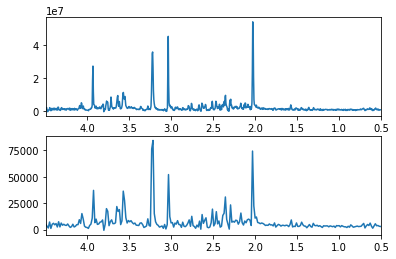

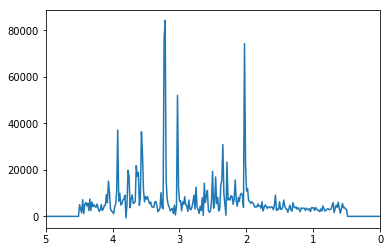

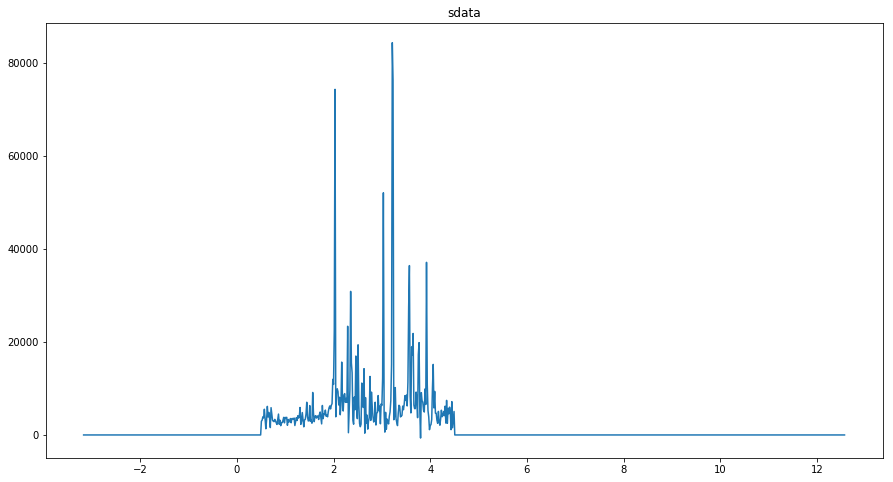

In [37]:
# Case E: model predict 837,add X_input image, 內插回520,再塞回2048
# Case E-1: model predict 837*2, reshape, 內插回520(real imag 分別內插),再塞回2048
##############################################
#print('norm_coefficient',norm_coefficient)
# NORM_PREDICT
ppm = interpo_x
ppm_cord_max = ppm.max()

NORM_PRED = pred_res[1]
print('NORM_PRED',NORM_PRED.shape)

plt.figure()
plt.subplot(211)
plt.plot(ppm,NORM_PRED)
plt.xlim(ppm.max(),ppm.min())

# 相除

NORM_PRED = (NORM_PRED.real/norm_coefficient_real) +1j*(NORM_PRED.imag/norm_coefficient_imag)

x = interpo_x
xnew=np.linspace(interpo_x[0],interpo_x[-1],len_1024_ppm_0_5_4_5)#len_1024_ppm_0_5_4_5 = 260
#NORM_PRED
f_real = interpolate.interp1d(x,NORM_PRED.real,kind="nearest")#["nearest","zero","slinear","quadratic","cubic"]
f_imag = interpolate.interp1d(x,NORM_PRED.imag,kind="nearest")#["nearest","zero","slinear","quadratic","cubic"]

# ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of first, second or third order)
NORM_PRED_new = f_real(xnew) + 1j*(f_imag(xnew))

plt.subplot(212)
plt.plot(xnew,NORM_PRED_new)
plt.xlim(xnew.max(),xnew.min())

pad_NORM_PRED = np.zeros([1024,],dtype=np.csingle)

##############################################


#####################ppm config#####################
sample_point = 1024
BW = 2000#Hz
B = 127#3T = 3*42.58= 127MHz
ppm_length = BW/B#16.xx ppm
ppm_center = 4.7
min_bound = ppm_center - (ppm_length)/2
max_bound = ppm_center + (ppm_length)/2
ppm = np.linspace(min_bound, max_bound, sample_point)
ppm = ppm[::-1]#reverse

#read_data= np.load(os.path.join(phantom_to_model_path, 'nws_TR800.npz'))
#ppm = read_data['ppm']

#####################ppm config#####################

pad_ppm_idx = abs(ppm - ppm_cord_max).argmin()
print('pad_ppm_idx',pad_ppm_idx)

print('NORM_PRED_new[0]',NORM_PRED_new.max())

pad_NORM_PRED[pad_ppm_idx:pad_ppm_idx+len(NORM_PRED_new)] = NORM_PRED_new

#plt.figure(figsize=(15,10))
plt.figure()
plt.plot
plt.plot(ppm,pad_NORM_PRED)
plt.xlim(5,0)
#print('ppm[0]-ppm[1]',ppm[0]-ppm[1])
print('len(pad_NORM_PRED)',len(pad_NORM_PRED))

# SAVE TO MAT
working_dir = os.getcwd()
dump_path = os.path.join(working_dir, 'TR_try_norm_pred_lcm')


pad_NORM_PRED_tdata = np.fft.ifft(pad_NORM_PRED)
pad_NORM_PRED_tdata = np.expand_dims(pad_NORM_PRED_tdata, axis=1)#(2048, 1)
pad_NORM_PRED = np.expand_dims(pad_NORM_PRED, axis=1)#(2048, 1)

plt.figure(figsize=(15,8))
plt.title('sdata')
plt.plot(ppm,pad_NORM_PRED)
#plt.ylim(-5000,pad_NORM_PRED.max())
#plt.xlim(4.4,0.4)

import scipy.io as sio
#sio.savemat(os.path.join(dump_path,'TR800','ws','meas_svs.mat'), {'sdata':pad_NORM_PRED})
#sio.savemat(os.path.join(dump_path,'TR1200','ws','meas_svs.mat'), {'sdata':pad_NORM_PRED})
#sio.savemat(os.path.join(dump_path,'TR2000','ws','meas_svs.mat'), {'sdata':pad_NORM_PRED})
sio.savemat(os.path.join(dump_path,'TR4000','ws','meas_svs.mat'), {'sdata':pad_NORM_PRED})

## Curve fitting 算面積

# In Vivo data: GongYJ: DLPFC, M1, 

In [93]:
def measure_width_hz(ppm, spectrum_data):
    if (spectrum_data.ndim == 2):
        spectrum_data = spectrum_data[:,0]
    tNAA_pos = np.where((ppm>=1.8) & (ppm<=2.2))
    tNAA_crop = spectrum_data[tNAA_pos]
    #tNAA_FWHM_val = max(tNAA_crop)*0.2
    tNAA_FWHM_val = max(tNAA_crop)*(1-0.707)
    tNAA_FWHM = np.where(tNAA_crop > tNAA_FWHM_val)
    tNAA_FWHM_width_ppm = max(ppm[tNAA_pos][tNAA_FWHM])-min(ppm[tNAA_pos][tNAA_FWHM])
    #ppm to Hz, (BW)/(total ppm = BW/B) * width_ppm = B*width_ppm
    tNAA_FWHM_width_hz = round(123.177*tNAA_FWHM_width_ppm, 3)
    return tNAA_FWHM_width_hz

def freq_shift_corr(ppm, spectrum_data):
    #print('spectrum_data.shape',spectrum_data.shape)
    tNAA_pos = np.where((ppm>=1.5) & (ppm<=2.5))
    NAA_peak_pos = np.array(np.where((spectrum_data == max(spectrum_data[tNAA_pos]))))[0]
    if len(NAA_peak_pos) > 1:
        NAA_peak_pos = int(NAA_peak_pos[0])
    ppm_2 = (np.abs(ppm - 2.0)).argmin()#The number was the cloest one to 2 ppm
    diff = NAA_peak_pos - ppm_2
    shift_point = NAA_peak_pos - ppm_2
    shift_correction = np.roll(spectrum_data,-shift_point)
    return shift_correction

def cal_area(ppm, spectrum):
    spectrum_max = spectrum.real.max()
    area_threadshold = spectrum_max*(1-0.99)
    area_pos_range = np.where(spectrum >= area_threadshold)
    area_pos_range_byppm = np.where((ppm >= 4) & (ppm <= 5))
    #print('Points in Area:',len(area_pos_range_byppm[0]))
    area_range = spectrum[area_pos_range]
    area = round(np.sum(area_range).real*abs(ppm[0]-ppm[1]), 5)#print('Area by threadshold = %E' %area)
    area_byppm = round(np.sum(spectrum[area_pos_range_byppm].real)*abs(ppm[0]-ppm[1]), 5)
    abs_area = round(np.sum(abs(area_range.real))*abs(ppm[0]-ppm[1]), 5)#Area by threadshold_ABS
    total_area = round(np.sum(spectrum).real*abs(ppm[0]-ppm[1]), 5)#All spectrum area
    total_area_abs = round(np.sum(abs(spectrum.real))*abs(ppm[0]-ppm[1]), 5)#All spectrum area ABS
    #print('ppm_gap', ppm[0]-ppm[1])
    #print('Spectrum area byppm = %E' %area_byppm)
    #plt.figure(figsize=(15,8))
    #plt.plot(211)
    #plt.title('NWS Spectrum', size = 18)
    #plt.title('Spectrum area byppm = %E' %area_byppm)
    #plt.plot(ppm,spectrum,color='gray')
    #plt.plot(ppm[area_pos_range_byppm],spectrum[area_pos_range_byppm],color='r', label='Calcuated Area')
    #plt.legend(loc='upper right')
    #plt.xlim(5.1,3.9)
    #plt.xlabel('PPM',size=12)
    #plt.ylabel('Magnitude', size=15)    
    return area_byppm

def measure_peak_phase(ppm,nws_data, corr_spectrum):
    before_corr = nws_data
    origin_peak_pos = np.argmax(before_corr.real)
    return corr_spectrum[origin_peak_pos].imag

def measure_peak_area(ppm,nws_data, corr_spectrum):
    before_corr = nws_data
    origin_peak_pos = np.argmax(before_corr.real)
    origin_peak_range = np.where((ppm >= 4) & (ppm <= 5))
    area = np.sum(corr_spectrum[origin_peak_range].real)*abs(ppm[0]-ppm[1])
    return area

###########################Zero-phase correction###########################
def zero_phase_corr(nws_data):    
    FT_M = np.abs(nws_data)
    FT_P = np.angle(nws_data, deg=True)
    var_phi_range = np.arange(-180, 180)
    phase_val = np.zeros([len(var_phi_range)])
    area_val = np.zeros([len(var_phi_range)])

    ######Find phase min######
    for idx, var_phi in enumerate(var_phi_range):
        angle = var_phi
        new_phase = FT_P + angle
        new_spectrum = nws_data * 0
        new_theada = new_phase * (np.pi / 180)
        new_spectrum = np.multiply(FT_M , np.cos(new_theada)) + 1j*np.multiply(FT_M , np.sin(new_theada))
        phase_val[idx] = abs(measure_peak_phase(ppm,nws_data, new_spectrum))
        area_val[idx] = measure_peak_area(ppm,nws_data, new_spectrum)
    #angle = var_phi_range[np.argmin(abs(phase_val))]
    #print('(phase_val)',(phase_val).min())
    angle = var_phi_range[np.argmax(area_val)]

    new_phase = FT_P + angle#FT_P = 52.96096145 角度
    new_theada = new_phase * (np.pi / 180)#iF angle = 0, new theada = 0.9 ..... 逕度 為了要丟下面的cos?
    #print('angle',angle)

    new_spectrum = nws_data * 0
    new_spectrum = np.multiply(FT_M , np.cos(new_theada)) + 1j*np.multiply(FT_M , np.sin(new_theada))
    return new_spectrum
###########################Zero-phase correction###########################
def ws_phase_corr(ws_data, angle):
    #print('angle',angle)    
    FT_M = np.abs(ws_data)
    FT_P = np.angle(ws_data, deg=True)
    new_phase = FT_P + angle#FT_P = 52.96096145 角度
    new_theada = new_phase * (np.pi / 180)#iF angle = 0, new theada = 0.9 ..... 逕度 為了要丟下面的cos?
    new_spectrum = ws_data * 0
    new_spectrum = np.multiply(FT_M , np.cos(new_theada)) + 1j*np.multiply(FT_M , np.sin(new_theada))
    return new_spectrum

## Read .npz data

files ['nws_DLPFC1.npz', 'nws_DLPFC2.npz', 'nws_DLPFC3.npz', 'nws_DLPFC4.npz', 'nws_DLPFC5.npz', 'ws_DLPFC1.npz', 'ws_DLPFC2.npz', 'ws_DLPFC3.npz', 'ws_DLPFC4.npz', 'ws_DLPFC5.npz']


HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "



ws_datasets (5, 2048)
nws_datasets (5, 2048)
[[0, 'Ala'], [1, 'Asp'], [2, 'Cr'], [3, 'GABA'], [4, 'Glc'], [5, 'Gln'], [6, 'Glu'], [7, 'GPC'], [8, 'PCh'], [9, 'Lac'], [10, 'mI'], [11, 'NAA'], [12, 'NAAG'], [13, 'tNAA'], [14, 'tCr'], [15, 'tCho'], [16, 'Glx'], [17, 'Glx/tCr'], [18, 'mI/tCr'], [19, 'tCho/tCr'], [20, 'tNAA/tCr'], [21, 'tCr/tCr']]
naa_cord len 63
interpo_x[0]-interpo_x[1] 0.004780193509247077


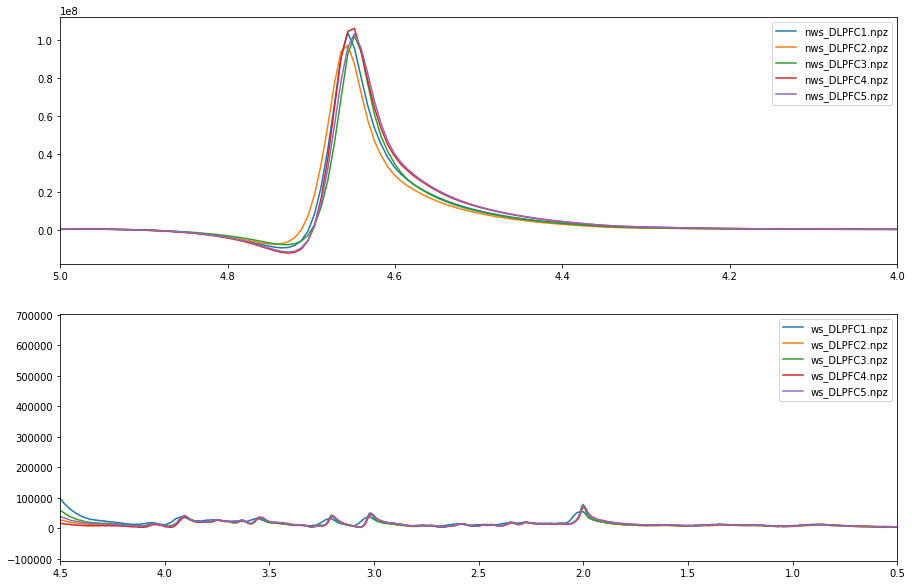

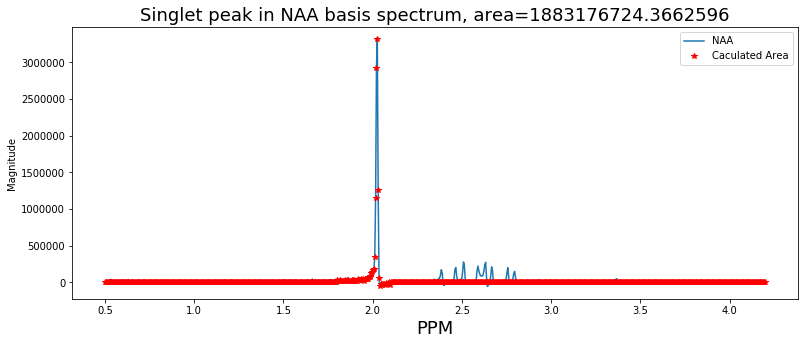

In [82]:
import time
from tqdm import tnrange, tqdm_notebook
import pandas as pd

working_dir = os.getcwd()
phantom_to_model_path = os.path.join(working_dir, 'phantom_TR_to_model')
invivo_to_model_path = os.path.join(working_dir, 'invivo_to_model')
subject_path = os.path.join(invivo_to_model_path, 'GongYJ')
#subject_path = os.path.join(invivo_to_model_path, 'PengBY')
region_path = os.path.join(subject_path, 'DLPFC')
#region_path = os.path.join(subject_path, 'M1')
#region_path = os.path.join(subject_path, 'VC')

ws_datasets = np.zeros((5,2048,),dtype=np.csingle)
nws_datasets = np.zeros((5,2048,),dtype=np.csingle)

files = [ f for f in sorted(os.listdir(region_path), key=lambda x: x[0]) if os.path.isfile(os.path.join(region_path,f)) ]
print('files',files)


plt.figure(figsize=(15,10))
for idx, cont in enumerate(tqdm_notebook(files)):
    if (idx < 5 ):
        read_data= np.load(os.path.join(region_path, cont))
        ppm = read_data['ppm']
        nws_data = read_data['X']
        if nws_data.ndim == 2:
            nws_data = nws_data[:,0]
        nws_datasets[idx,:] = nws_data
        plt.subplot(211)
        plt.plot(ppm, nws_data, label=files[idx])
        plt.xlim(5,4)
        plt.legend(loc='upper right')
    else:
        read_data= np.load(os.path.join(region_path, cont))
        ppm = read_data['ppm']
        ws_read_data = read_data['X']
        if ws_read_data.ndim == 2:
            ws_read_data = ws_read_data[:,0]
        ws_datasets[idx-5,:] = ws_read_data
        plt.subplot(212)
        plt.plot(ppm, ws_read_data, label=files[idx])
        plt.xlim(4.5,0.5)
        #plt.ylim(-1000,50000)
        plt.legend(loc='upper right')
        
print('ws_datasets',ws_datasets.shape)
print('nws_datasets',nws_datasets.shape)

##########################################Basis filter#########################################
#################To get NAA singlet 2.0 ppm Peak 1 mole Area#################
rd = np.load(os.path.join(working_dir,'42ppm_base_basis_set.npz'))
#rd = np.load(os.path.join(working_dir,'gamma_42ppm_base_basis_set.npz'))
base_basis_set = rd['data']

read_data= np.load(os.path.join(region_path, files[0]))
ppm = read_data['ppm']
pos = np.where((ppm>=0.5) & (ppm<=4.2))
crop_ppm = ppm[pos]

interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],774)

brain_metabo_index =  brain_conc_set[0].index
add_metabo_index = brain_metabo_index[:-2]
add_metabo_index = list(add_metabo_index)
add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tCr','mI/tCr','tCho/tCr','tNAA/tCr','tCr/tCr'])

print ([list((i, add_metabo_index[i])) for i in range(len(add_metabo_index))]) 

denoise_basis_set = base_basis_set*0
#plt.figure(figsize = (15,10))
for i in range(len(base_basis_set)):
    thd = np.quantile(base_basis_set[i].real, .90)
    denoise_basis_set[i]  = base_basis_set[i]
    #denoise_basis_set[i][denoise_basis_set[i] < thd] = 0
    #LCModel basis
    if i ==11:#11 = NAA
        denoise_basis_set[i] = denoise_basis_set[i]*0
        naa_cord = np.where((interpo_x>1.8)&(interpo_x<2.1))
        denoise_basis_set[i][naa_cord] = base_basis_set[i][naa_cord]
        naa_area = np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])
        w_area = naa_area *55556 * (2/3)
        print('naa_cord len',len(naa_cord[0]))
        print('interpo_x[0]-interpo_x[1]',interpo_x[0]-interpo_x[1])
        #print('w_area (naa_area *55556 * (2/3)) =', w_area)
    ##########Visualize spectra##########
    if i == 11:#lcmbasis
    #if i == 12:#gamma basis
        plt.figure(figsize=(13,5))
        #plt.subplot(211)
        #cal_area(ppm, abs(new_spectrum.real))
        #plt.subplot(212)
        #plt.title('Original and filtered, area = %E' %(np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])))
        #plt.title('Calculate the singlet area in basis for simulated water signal')
        #plt.title('Singlet peak in NAA basis spectrum',size=18)
        plt.title(f'Singlet peak in NAA basis spectrum, area={w_area}',size=18)
        plt.plot(interpo_x,base_basis_set[i],label = add_metabo_index[i])
        #plt.plot(interpo_x, denoise_basis_set[i], color='r',label = 'Caculated Area')
        plt.plot(interpo_x, denoise_basis_set[i],'*', color='r',label = 'Caculated Area')        
        #plt.xlim(interpo_x.max(),interpo_x.min())
        #plt.xlim(2.3,1.8)
        #plt.xlim(4.2,0.5)
        plt.xlabel('PPM',size=18)
        plt.ylabel('Magnitude')
        plt.legend(loc='upper right')
##########################################Basis filter#########################################

naa_cord len 63
interpo_x[0]-interpo_x[1] 0.004780193509247077


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


naa_cord len 63
interpo_x[0]-interpo_x[1] 0.004780193509247077
naa_cord len 63
interpo_x[0]-interpo_x[1] 0.004780193509247077
naa_cord len 63
interpo_x[0]-interpo_x[1] 0.004780193509247077
naa_cord len 63
interpo_x[0]-interpo_x[1] 0.004780193509247077
naa_cord len 63
interpo_x[0]-interpo_x[1] 0.004780193509247077
naa_cord len 63
interpo_x[0]-interpo_x[1] 0.004780193509247077
naa_cord len 63
interpo_x[0]-interpo_x[1] 0.004780193509247077
naa_cord len 63
interpo_x[0]-interpo_x[1] 0.004780193509247077
naa_cord len 63
interpo_x[0]-interpo_x[1] 0.004780193509247077
naa_cord len 63
interpo_x[0]-interpo_x[1] 0.004780193509247077
naa_cord len 63
interpo_x[0]-interpo_x[1] 0.004780193509247077
naa_cord len 63
interpo_x[0]-interpo_x[1] 0.004780193509247077


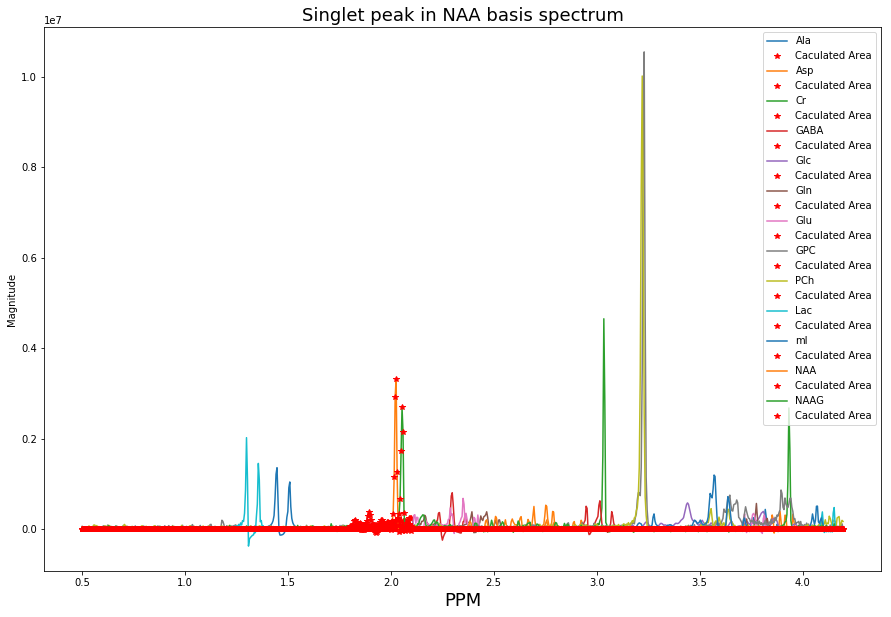

In [55]:

'''
plt.figure(figsize = (15,10))
for i in range(len(base_basis_set)):
    thd = np.quantile(base_basis_set[i].real, .90)
    denoise_basis_set[i]  = base_basis_set[i]
    #plt.subplot(211)
    #cal_area(ppm, abs(new_spectrum.real))
    #plt.subplot(212)
    #plt.title('Original and filtered, area = %E' %(np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])))
    #plt.title('Calculate the singlet area in basis for simulated water signal')
    plt.title('Singlet peak in NAA basis spectrum',size=18)
    plt.plot(interpo_x,base_basis_set[i],label = add_metabo_index[i])
    #plt.plot(interpo_x, denoise_basis_set[i], color='r',label = 'Caculated Area')
    plt.plot(interpo_x, denoise_basis_set[i],'*', color='r',label = 'Caculated Area')        
    #plt.xlim(interpo_x.max(),interpo_x.min())
    #plt.xlim(2.3,1.8)
    #plt.xlim(4.2,0.5)
    plt.xlabel('PPM',size=18)
    plt.ylabel('Magnitude')
    plt.legend(loc='upper right')
'''
denoise_basis_set = base_basis_set*0
plt.figure(figsize = (15,10))
for i in range(len(base_basis_set)):
    thd = np.quantile(base_basis_set[i].real, .90)
    denoise_basis_set[i]  = base_basis_set[i]
    #denoise_basis_set[i][denoise_basis_set[i] < thd] = 0
    #gamma basis
    denoise_basis_set[i] = denoise_basis_set[i]*0
    naa_cord = np.where((interpo_x>1.8)&(interpo_x<2.1))
    denoise_basis_set[i][naa_cord] = base_basis_set[i][naa_cord]
    naa_area = np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])
    w_area = naa_area *55556 * (2/3)
    print('naa_cord len',len(naa_cord[0]))
    print('interpo_x[0]-interpo_x[1]',interpo_x[0]-interpo_x[1])
    #print('w_area (naa_area *55556 * (2/3)) =', w_area)   
    ##########Visualize spectra##########
    #plt.figure(figsize=(13,5))
    plt.title('Singlet peak in NAA basis spectrum',size=18)
    plt.plot(interpo_x,base_basis_set[i],label = add_metabo_index[i])
    plt.plot(interpo_x, denoise_basis_set[i],'*', color='r',label = 'Caculated Area')
    #plt.xlim(interpo_x.max(),interpo_x.min())
    #plt.xlim(2.3,1.8)
    #plt.xlim(4.2,0.5)
    plt.xlabel('PPM',size=18)
    plt.ylabel('Magnitude')
    plt.legend(loc='upper right')

## 選擇頻譜

w_area: 1883176724.3662596, abs_real_NWS_area: 10026722.06717
norm_coefficient_real 187.81578982150629


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


#####real_conc#####
lazy


KeyError: 'Metabo'

<Figure size 1080x576 with 0 Axes>

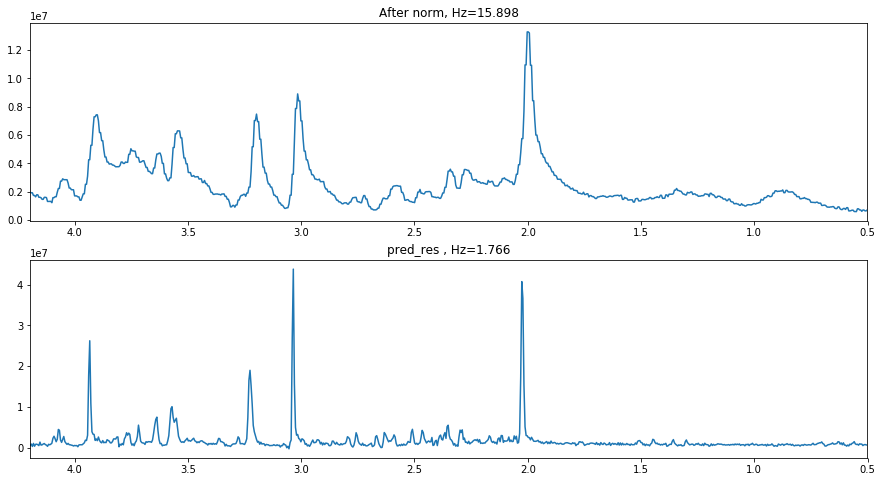

In [83]:
#measure NAA basis
#print ([list((i, add_metabo_index[i])) for i in range(len(add_metabo_index))])

#print('files',files)
plt.figure(figsize=(15,8))
#for cur_sel_id in range(5):
for cur_sel_id in range(1,2):
    #cur_sel_id = 2
    ws_data = ws_datasets[cur_sel_id,:]
    nws_data = nws_datasets[cur_sel_id,:]
    
    '''
    large_42ppm = np.where(ppm>4.2)
    print(large_42ppm)
    fillinval = np.ones([len(large_42ppm)])*ws_data[large_42ppm[0]][-1]
    print(fillinval)
    ws_data[large_42ppm] = fillinval
    '''
    #print('ppm',len(ppm))
    #print('nws_data',len(nws_data))

    ########################算NWS 面積囉######################
    new_spectrum = zero_phase_corr(nws_data)
    abs_real_NWS_area = cal_area(ppm, abs(new_spectrum.real))
    ########################得NWS 面積########################
    
    ########################對WS修正相位囉######################
    #corr_angle = (np.angle(new_spectrum, deg=True) - np.angle(nws_data, deg=True))
    corr_angle = 0
    ws_data = ws_phase_corr(ws_data, corr_angle)    
    ########################得NWS 面積########################
    #norm_coefficient_real = 1.99E+02
    norm_coefficient_real = w_area / abs_real_NWS_area
    print(f'w_area: {w_area}, abs_real_NWS_area: {abs_real_NWS_area}')
    norm_coefficient_imag = norm_coefficient_real
    print('norm_coefficient_real',norm_coefficient_real)
    
    pos = np.where((ppm>=0.5) & (ppm<=4.2))
    crop_ppm = ppm[pos]
    len_2048_ppm_0_5_4_5 = len(crop_ppm)
    ws_data = ws_data[pos]

    ##########################interpolation 給CNN 所以要內插##########################
    import scipy as scipy
    from scipy import interpolate

    x = crop_ppm
    interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],774)
    #interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],467)

    real_f = interpolate.interp1d(x,ws_data.real,kind="nearest")
    imag_f = interpolate.interp1d(x,ws_data.imag,kind="nearest")
    interpo_ws_data = real_f(interpo_x) + 1j*(imag_f(interpo_x))

    ##########################interpolation##########################
    #plt.figure(figsize=(15,8))
    #plt.subplot(211)
    #plt.title('Before norm max.peak to 2e+07')
    #plt.plot(interpo_x,interpo_ws_data)
    #plt.xlim(interpo_x.max(),interpo_x.min())
      
    norm_interpo_ws_data = ((interpo_ws_data.real) * norm_coefficient_real) + 1j*((interpo_ws_data.imag) * norm_coefficient_imag)
    norm_interpo_ws_data = np.expand_dims(norm_interpo_ws_data, axis = 1)

    #plt.subplot(212)
    #plt.title('After norm ')
    #plt.plot(interpo_x,norm_interpo_ws_data)
    #plt.xlim(interpo_x.max(),interpo_x.min())
    ###############################################################################
    interpo_ws_data = np.expand_dims(interpo_ws_data, axis = 1)

    compare_norm_interpo_ws_data = np.append(interpo_ws_data, norm_interpo_ws_data,axis = 1)

    X_input = np.expand_dims(compare_norm_interpo_ws_data.T,axis = 2)#NSA data
    pred_res = model.predict(X_input, verbose=0)

    input_name = ['Before norm', 'After norm']
    # Visualize the predicton result
    for num in range(1,2):
    #for num in range(len(X_input)):
        #plt.figure(figsize=(15,8))
        plt.subplot(211)
        plt.title(f'{input_name[num]}, Hz={measure_width_hz(interpo_x, X_input[num])}')
        plt.plot(interpo_x,X_input[num])
        plt.xlim(interpo_x.max(),interpo_x.min())
        plt.subplot(212)
        #print(pred_res[num].shape)
        plt.title(f'pred_res , Hz={measure_width_hz(interpo_x, pred_res[num])}')
        plt.plot(interpo_x,pred_res[num])
        plt.xlim(interpo_x.max(),interpo_x.min())
    ###################for abtract figure############################################
    '''
    plt.figure(figsize=(15,6))
    plt.subplot(211)
    #plt.plot(interpo_x,X_input[1]*2.3,color='gray',label='Orignal spectrum')
    plt.plot(interpo_x,X_input[1]*2.1,color='k')
    #print(pred_res[num].shape)
    plt.title(f'Subject 2, Dorsal Lateral Prefrontal Cortex (DLPFC)', size = 18)
    #plt.plot(interpo_x,pred_res[1],color ='r',label='CNN prediction')
    
    plt.plot(interpo_x,pred_res[1],color ='r')
    #plt.xlim(interpo_x.max()-0.2,interpo_x.min())
    #plt.yticks([])
    plt.xlim(4.2,0.5)
    plt.xlabel('PPM',size=20)
    #plt.ylabel('Magnitude', size=15)
    plt.legend(loc='upper right')
    #import scipy.io as sio
    #sio.savemat('cnn_predict.mat', {'input':X_input[1], 'output':pred_res[1], 'ppm':interpo_x})
    '''
    ###################for abtract figure############################################
    ######################################定量囉######################################
    # Solve matrix problem to quantification
    brain_metabo_index =  brain_conc_set[0].index
    add_metabo_index = brain_metabo_index[:-2]
    add_metabo_index = list(add_metabo_index)
    add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tCr','mI/tCr','tCho/tCr','tNAA/tCr','tCr/tCr'])

    C_set = pd.DataFrame(data=np.zeros([len(add_metabo_index),len(pred_res)]), index=add_metabo_index)
    water_area = abs_real_NWS_area
    water_conc = 55556

    pinv_b = np.linalg.pinv(denoise_basis_set.real)
    pd.set_option('display.max_columns', None)
    #For LCM basis
    for i in (range(len(pred_res))):
        C = np.matmul(pred_res[i].real, pinv_b)
        #tNAA = NAA + NAAG, [11] + [12]
        C = np.append(C, C[11]+C[12])
        #tCr = Cr + PCr, [2]+[NA]
        C = np.append(C, C[2])
        #tCho = PC + GPC, [8]+[7]
        C = np.append(C, C[8]+C[7])
        #Glx = (Gln + Glu), [5]+[6]
        C = np.append(C, C[5]+C[6])
        #'Glx/tCr' = [16]/[14]
        C = np.append(C, C[16]/C[14])
        #'mI/tCr' = [10]/[14]
        C = np.append(C, C[10]/C[14])    
        #'tCho/tCr' = [15]/[14]
        C = np.append(C, C[15]/C[14])
        #'tNAA/tCr' = [13]/[14]
        C = np.append(C, C[13]/C[14])
        #'tCr/tCr' = [14]/[14]
        C = np.append(C, C[14]/C[14])    
        C_set[i] = C
    real_conc = (C_set[1])
    #print('#####real_conc#####')    
    new_info = pd.Series([water_area, w_area, norm_coefficient_real], index=['NWS area', 'w_area', 'norm_coef'])
    dump_to_csv = pd.concat([real_conc, new_info])
    #for LCModel basis
    dump_to_csv = dump_to_csv.loc[["Cr", "Glu",'Gln','GPC','PCh',"mI",'NAA','NAAG',"tNAA","tCho","Glx", 'NWS area', 'w_area', 'norm_coef']]
    if cur_sel_id == 0:
        dump_to_csv = pd.DataFrame({'Metabo':dump_to_csv.index, cur_sel_id:dump_to_csv.values})
    else:
        dump_to_csv = pd.DataFrame({cur_sel_id:dump_to_csv.values})
    
    conv_path = os.path.join(working_dir,'deconv_result',f'{os.path.basename(subject_path)}_{files[cur_sel_id][:-4]}_deconv_result.csv')
    #dump_to_csv.to_csv(conv_path)
    if cur_sel_id == 0:
        lazy = dump_to_csv
    else:
        lazy = pd.concat([lazy,dump_to_csv], axis = 1)

print('#####real_conc#####')
print('lazy')
lazy = lazy.set_index('Metabo')
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
print(lazy)
#lazy_path = os.path.join(working_dir,'deconv_result',f'Lazy_{os.path.basename(subject_path)}_{os.path.basename(region_path)}_deconv_result.csv')
#lazy.to_csv(lazy_path)


# DL Invivo data

In [108]:
import time
from tqdm import tnrange, tqdm_notebook
import pandas as pd
import scipy as scipy
from scipy import interpolate



working_dir = os.getcwd()
invivo_to_model_path = os.path.join(working_dir, 'DL_invivo','108_DL')
subject_id = [ f for f in os.listdir(invivo_to_model_path) if os.path.isdir(os.path.join(invivo_to_model_path,f)) ]
##########################################Basis filter#########################################
#################To get NAA singlet 2.0 ppm Peak 1 mole Area#################
rd = np.load(os.path.join(working_dir,'42ppm_base_basis_set.npz'))
base_basis_set = rd['data']
ppm = rd['ppm']
pos = np.where((ppm>=0.5) & (ppm<=4.2))
crop_ppm = ppm[pos]
interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],774)

brain_metabo_index =  brain_conc_set[0].index
add_metabo_index = brain_metabo_index[:-2]
add_metabo_index = list(add_metabo_index)
add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tCr','mI/tCr','tCho/tCr','tNAA/tCr','tCr/tCr'])

print ([list((i, add_metabo_index[i])) for i in range(len(add_metabo_index))]) 
denoise_basis_set = base_basis_set*0
#plt.figure(figsize = (15,10))
for i in range(len(base_basis_set)):
    thd = np.quantile(base_basis_set[i].real, .90)
    denoise_basis_set[i]  = base_basis_set[i]
    #denoise_basis_set[i][denoise_basis_set[i] < thd] = 0
    #LCModel basis
    if i ==11:#11 = NAA
        denoise_basis_set[i] = denoise_basis_set[i]*0
        naa_cord = np.where((interpo_x>1.8)&(interpo_x<2.1))
        denoise_basis_set[i][naa_cord] = base_basis_set[i][naa_cord]
        naa_area = np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])
        w_area = naa_area *55556 * (2/3)
        print('naa_cord len',len(naa_cord[0]))
        print('interpo_x[0]-interpo_x[1]',interpo_x[0]-interpo_x[1])
        #print('w_area (naa_area *55556 * (2/3)) =', w_area)
    ##########Visualize spectra##########
    '''
    if i == 11:#lcmbasis
        plt.figure(figsize=(13,5))
        plt.title(f'Singlet peak in NAA basis spectrum, area={w_area}',size=18)
        plt.plot(interpo_x,base_basis_set[i],label = add_metabo_index[i])
        #plt.plot(interpo_x, denoise_basis_set[i], color='r',label = 'Caculated Area')
        plt.plot(interpo_x, denoise_basis_set[i],'*', color='r',label = 'Caculated Area')        
        #plt.xlim(interpo_x.max(),interpo_x.min())
        #plt.xlim(2.3,1.8)
        #plt.xlim(4.2,0.5)
        plt.xlabel('PPM',size=18)
        plt.ylabel('Magnitude')
        plt.legend(loc='upper right')
    '''
##########################################Basis filter#########################################
##########################################Read file#########################################
for subject in subject_id:
    subject_path = os.path.join(invivo_to_model_path,subject)
    region_id = [ f for f in os.listdir(subject_path) if os.path.isdir(os.path.join(subject_path,f)) ]
    if region_id.count('MPRAGE'):
        region_id.remove('MPRAGE')
    print(f'########{subject}########')
    for reg_idx,region in enumerate(region_id):
        files_path = os.path.join(subject_path,region,'to_cnn')
        #files = [ f for f in os.listdir(files_path) if os.path.isfile(os.path.join(files_path,f))]
        files = [ f for f in sorted(os.listdir(files_path), key=lambda x: x[-6]) if os.path.isfile(os.path.join(files_path,f)) ]
        print(f'#####{region}#####')
        #print(region)
        ws_datasets = np.zeros((len(files)-1,2048,),dtype=np.csingle)
        nws_data = np.zeros((1,2048,),dtype=np.csingle)
        #plt.figure(reg_idx,figsize=(15,10))
        for idx,cont in enumerate(files):
            if (cont[:3] == 'nws'):
                read_data = np.load(os.path.join(files_path, cont))
                nws_data = read_data['X']
            else:
                read_data= np.load(os.path.join(files_path, cont))
                ppm = read_data['ppm']
                rd_sdata = read_data['X']
                if rd_sdata.ndim == 2:
                    rd_sdata = rd_sdata[:,0]                
                ws_datasets[idx,:] = rd_sdata
                '''
                plt.title(region)
                plt.plot(ppm, ws_datasets[idx,:], label=cont)
                plt.xlim(4.5,0.5)
                #plt.ylim(-1000,50000)
                plt.legend(loc='upper right')
                '''
        #plt.figure(figsize=(15,8))
        for cur_sel_id in range(ws_datasets.shape[0]):
            #cur_sel_id = 2
            ws_data = ws_datasets[cur_sel_id,:]
            nws_data = nws_data
            ########################算NWS 面積囉######################
            if cur_sel_id == 0:
                new_spectrum = zero_phase_corr(nws_data)
                abs_real_NWS_area = cal_area(ppm, abs(new_spectrum.real))
            ########################得NWS 面積########################
            ########################對WS修正相位囉######################
            #corr_angle = (np.angle(new_spectrum, deg=True) - np.angle(nws_data, deg=True))
            corr_angle = 0
            ws_data = ws_phase_corr(ws_data, corr_angle)    
            ########################得NWS 面積########################
            #norm_coefficient_real = 1.99E+02
            #norm_coefficient_real = (w_area / abs_real_NWS_area )/1.5
            norm_coefficient_real = (w_area / abs_real_NWS_area)
            #print(f'w_area: {w_area}, abs_real_NWS_area: {abs_real_NWS_area}')
            norm_coefficient_imag = norm_coefficient_real
            #print('norm_coefficient_real',norm_coefficient_real)

            pos = np.where((ppm>=0.5) & (ppm<=4.2))
            crop_ppm = ppm[pos]
            len_2048_ppm_0_5_4_5 = len(crop_ppm)
            ws_data = ws_data[pos]

            ##########################interpolation 給CNN 所以要內插##########################
            x = crop_ppm
            interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],774)
            real_f = interpolate.interp1d(x,ws_data.real,kind="nearest")
            imag_f = interpolate.interp1d(x,ws_data.imag,kind="nearest")
            interpo_ws_data = real_f(interpo_x) + 1j*(imag_f(interpo_x))
            ##########################interpolation##########################
            norm_interpo_ws_data = ((interpo_ws_data.real) * norm_coefficient_real) + 1j*((interpo_ws_data.imag) * norm_coefficient_imag)
            norm_interpo_ws_data = np.expand_dims(norm_interpo_ws_data, axis = 1)
            ###############################################################################
            interpo_ws_data = np.expand_dims(interpo_ws_data, axis = 1)
            compare_norm_interpo_ws_data = np.append(interpo_ws_data, norm_interpo_ws_data,axis = 1)
            X_input = np.expand_dims(compare_norm_interpo_ws_data.T,axis = 2)#NSA data
            pred_res = model.predict(X_input, verbose=0)
            
            '''
            input_name = ['Before norm', 'After norm']
            # Visualize the predicton result
            if cur_sel_id == (ws_datasets.shape[0]-1):
                #plt.figure(figsize=(15,8))
                for num in range(1,2):
                #for num in range(len(X_input)):
                    plt.figure(figsize=(15,8))
                    #plt.subplot(211)
                    #plt.title(f'{subject}_{region}_{input_name[num]}, Hz={measure_width_hz(interpo_x, X_input[num])}')
                    plt.plot(interpo_x,X_input[num],label='input')
                    plt.xlim(interpo_x.max(),interpo_x.min())
                    #plt.subplot(212)
                    plt.title(f'{subject}_{region}_NSA64_pred_res , Hz={measure_width_hz(interpo_x, pred_res[num])}')
                    plt.plot(interpo_x,pred_res[num],label='output')
                    plt.xlim(interpo_x.max(),interpo_x.min())
                    plt.legend(loc='upper right')
            '''
            ######################################定量囉######################################
            # Solve matrix problem to quantification
            brain_metabo_index =  brain_conc_set[0].index
            add_metabo_index = brain_metabo_index[:-2]
            add_metabo_index = list(add_metabo_index)
            add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tCr','mI/tCr','tCho/tCr','tNAA/tCr','tCr/tCr'])
            C_set = pd.DataFrame(data=np.zeros([len(add_metabo_index),len(pred_res)]), index=add_metabo_index)
            water_area = abs_real_NWS_area
            water_conc = 55556
            pinv_b = np.linalg.pinv(denoise_basis_set.real)
            pd.set_option('display.max_columns', None)
            #For LCM basis
            for i in (range(len(pred_res))):
                C = np.matmul(pred_res[i].real, pinv_b)
                #tNAA = NAA + NAAG, [11] + [12]
                C = np.append(C, C[11]+C[12])
                #tCr = Cr + PCr, [2]+[NA]
                C = np.append(C, C[2])
                #tCho = PC + GPC, [8]+[7]
                C = np.append(C, C[8]+C[7])
                #Glx = (Gln + Glu), [5]+[6]
                C = np.append(C, C[5]+C[6])
                #'Glx/tCr' = [16]/[14]
                C = np.append(C, C[16]/C[14])
                #'mI/tCr' = [10]/[14]
                C = np.append(C, C[10]/C[14])    
                #'tCho/tCr' = [15]/[14]
                C = np.append(C, C[15]/C[14])
                #'tNAA/tCr' = [13]/[14]
                C = np.append(C, C[13]/C[14])
                #'tCr/tCr' = [14]/[14]
                C = np.append(C, C[14]/C[14])    
                C_set[i] = C
            real_conc = (C_set[1])
            #print('#####real_conc#####')    
            new_info = pd.Series([water_area, w_area, norm_coefficient_real], index=['NWS area', 'w_area', 'norm_coef'])
            dump_to_csv = pd.concat([real_conc, new_info])
            #for LCModel basis
            dump_to_csv = dump_to_csv.loc[["Cr", "Glu",'Gln','GPC','PCh',"mI",'NAA','NAAG',"tNAA","tCho","Glx", 'NWS area', 'w_area', 'norm_coef']]
            if cur_sel_id == 0:
                dump_to_csv = pd.DataFrame({'Metabo':dump_to_csv.index, cur_sel_id:dump_to_csv.values})
            else:
                dump_to_csv = pd.DataFrame({cur_sel_id:dump_to_csv.values})
            conv_path = os.path.join(working_dir,'deconv_result',f'{os.path.basename(subject_path)}_{files[cur_sel_id][:-4]}_deconv_result.csv')
            #dump_to_csv.to_csv(conv_path)
            if cur_sel_id == 0:
                lazy = dump_to_csv
            else:
                lazy = pd.concat([lazy,dump_to_csv], axis = 1)
        #print('#####real_conc#####')
        #print('lazy')
        lazy = lazy.set_index('Metabo')
        pd.set_option('display.max_rows', 500)
        pd.set_option('display.width', 1000)
        #print(lazy)
        #lazy_path = os.path.join(working_dir,'deconv_result',f'Lazy_{subject}_{region}_deconv_result.csv')
        #lazy.to_csv(lazy_path)
    #break

[[0, 'Ala'], [1, 'Asp'], [2, 'Cr'], [3, 'GABA'], [4, 'Glc'], [5, 'Gln'], [6, 'Glu'], [7, 'GPC'], [8, 'PCh'], [9, 'Lac'], [10, 'mI'], [11, 'NAA'], [12, 'NAAG'], [13, 'tNAA'], [14, 'tCr'], [15, 'tCho'], [16, 'Glx'], [17, 'Glx/tCr'], [18, 'mI/tCr'], [19, 'tCho/tCr'], [20, 'tNAA/tCr'], [21, 'tCr/tCr']]
naa_cord len 63
interpo_x[0]-interpo_x[1] 0.0047788698689874565
########DL001########
#####M1#####


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


lazy
#####MPFC#####
lazy
#####PCC#####
lazy
#####THAL#####
lazy
########DL002########
#####M1#####
lazy
#####MPFC#####
lazy
#####PCC#####
lazy
#####THAL#####
lazy
########DL003########
#####M1#####
lazy
#####MPFC#####
lazy
#####PCC#####
lazy
#####THAL#####
lazy
########DL004########
#####M1#####
lazy
#####MPFC#####
lazy
#####PCC#####
lazy
#####THAL#####
lazy
########DL005########
#####M1#####
lazy
#####MPFC#####
lazy
#####PCC#####
lazy
#####THAL#####
lazy
########DL006########
#####M1#####
lazy
#####MPFC#####
lazy
#####PCC#####
lazy
#####THAL#####
lazy
########DL007########
#####M1#####
lazy
#####MPFC#####
lazy
#####PCC#####
lazy
#####THAL#####
lazy


In [110]:
#plot test data

#plot invivo data

print ([list((i, add_metabo_index[i])) for i in range(len(add_metabo_index))]) 
denoise_basis_set = base_basis_set*0
#plt.figure(figsize = (15,10))
for i in range(len(base_basis_set)):
    thd = np.quantile(base_basis_set[i].real, .90)
    denoise_basis_set[i]  = base_basis_set[i]
    if i ==11:#11 = NAA
        denoise_basis_set[i] = denoise_basis_set[i]*0
        naa_cord = np.where((interpo_x>1.8)&(interpo_x<2.1))
        denoise_basis_set[i][naa_cord] = base_basis_set[i][naa_cord]
        naa_area = np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])
        w_area = naa_area *55556 * (2/3)
        print('naa_cord len',len(naa_cord[0]))
        print('interpo_x[0]-interpo_x[1]',interpo_x[0]-interpo_x[1])
        #print('w_area (naa_area *55556 * (2/3)) =', w_area)
##########################################Basis filter#########################################
##########################################Read file#########################################
for subject in subject_id:
    subject_path = os.path.join(invivo_to_model_path,subject)
    region_id = [ f for f in os.listdir(subject_path) if os.path.isdir(os.path.join(subject_path,f)) ]
    if region_id.count('MPRAGE'):
        region_id.remove('MPRAGE')
    print(f'########{subject}########')
    for reg_idx,region in enumerate(region_id):
        files_path = os.path.join(subject_path,region,'to_cnn')
        #files = [ f for f in os.listdir(files_path) if os.path.isfile(os.path.join(files_path,f))]
        files = [ f for f in sorted(os.listdir(files_path), key=lambda x: x[-6]) if os.path.isfile(os.path.join(files_path,f)) ]
        print(f'#####{region}#####')
        #print(region)
        ws_datasets = np.zeros((len(files)-1,2048,),dtype=np.csingle)
        nws_data = np.zeros((1,2048,),dtype=np.csingle)
        #plt.figure(reg_idx,figsize=(15,10))
        for idx,cont in enumerate(files):
            if (cont[:3] == 'nws'):
                read_data = np.load(os.path.join(files_path, cont))
                nws_data = read_data['X']
            else:
                read_data= np.load(os.path.join(files_path, cont))
                ppm = read_data['ppm']
                rd_sdata = read_data['X']
                if rd_sdata.ndim == 2:
                    rd_sdata = rd_sdata[:,0]                
                ws_datasets[idx,:] = rd_sdata
        #plt.figure(figsize=(15,8))
        for cur_sel_id in range(ws_datasets.shape[0]):
            #cur_sel_id = 2
            ws_data = ws_datasets[cur_sel_id,:]
            nws_data = nws_data
            ########################算NWS 面積囉######################
            if cur_sel_id == 0:
                new_spectrum = zero_phase_corr(nws_data)
                abs_real_NWS_area = cal_area(ppm, abs(new_spectrum.real))
            ########################得NWS 面積########################
            ########################對WS修正相位囉######################
            #corr_angle = (np.angle(new_spectrum, deg=True) - np.angle(nws_data, deg=True))
            corr_angle = 0
            ws_data = ws_phase_corr(ws_data, corr_angle)    
            ########################得NWS 面積########################
            #norm_coefficient_real = 1.99E+02
            #norm_coefficient_real = (w_area / abs_real_NWS_area )/1.5
            norm_coefficient_real = (w_area / abs_real_NWS_area)
            norm_coefficient_imag = norm_coefficient_real

            pos = np.where((ppm>=0.5) & (ppm<=4.2))
            crop_ppm = ppm[pos]
            len_2048_ppm_0_5_4_5 = len(crop_ppm)
            ws_data = ws_data[pos]

            ##########################interpolation 給CNN 所以要內插##########################
            x = crop_ppm
            interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],774)
            real_f = interpolate.interp1d(x,ws_data.real,kind="nearest")
            imag_f = interpolate.interp1d(x,ws_data.imag,kind="nearest")
            interpo_ws_data = real_f(interpo_x) + 1j*(imag_f(interpo_x))
            ##########################interpolation##########################
            norm_interpo_ws_data = ((interpo_ws_data.real) * norm_coefficient_real) + 1j*((interpo_ws_data.imag) * norm_coefficient_imag)
            norm_interpo_ws_data = np.expand_dims(norm_interpo_ws_data, axis = 1)
            print('norm_interpo_ws_data.shape')

[[0, 'Ala'], [1, 'Asp'], [2, 'Cr'], [3, 'GABA'], [4, 'Glc'], [5, 'Gln'], [6, 'Glu'], [7, 'GPC'], [8, 'PCh'], [9, 'Lac'], [10, 'mI'], [11, 'NAA'], [12, 'NAAG'], [13, 'tNAA'], [14, 'tCr'], [15, 'tCho'], [16, 'Glx'], [17, 'Glx/tCr'], [18, 'mI/tCr'], [19, 'tCho/tCr'], [20, 'tNAA/tCr'], [21, 'tCr/tCr']]
naa_cord len 63
interpo_x[0]-interpo_x[1] 0.004780195526572051
########DL001########
#####M1#####
norm_interpo_ws_data.shape
norm_interpo_ws_data.shape
norm_interpo_ws_data.shape
norm_interpo_ws_data.shape
norm_interpo_ws_data.shape
norm_interpo_ws_data.shape
norm_interpo_ws_data.shape
norm_interpo_ws_data.shape
#####MPFC#####
norm_interpo_ws_data.shape
norm_interpo_ws_data.shape
norm_interpo_ws_data.shape
norm_interpo_ws_data.shape
norm_interpo_ws_data.shape
norm_interpo_ws_data.shape
norm_interpo_ws_data.shape
norm_interpo_ws_data.shape
#####PCC#####
norm_interpo_ws_data.shape
norm_interpo_ws_data.shape
norm_interpo_ws_data.shape
norm_interpo_ws_data.shape
norm_interpo_ws_data.shape
norm_i